<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this bootcamp!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lecture notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [140]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import pprint
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid')

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file.
%matplotlib inline

# this line makes plots prettier on mac retina screens. If you don't have one it shouldn't do anything.
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [141]:
sat_path = './sat_scores.csv'
d={}
with open(sat_path, 'rb') as file:
    reader = csv.DictReader(file)
    # initialise the dictionary
    d = {k: [v] for k,v in reader.next().items()}
    # add in the values
    for row in reader:
        for k, v in row.items():
            d[k].append(v)

# convert to float
d = {k: [int(v) if v.isdigit() else v for v in val] for k, val in d.items()}
pprint.pprint(d)

{'Math': [510,
          513,
          515,
          505,
          516,
          499,
          499,
          506,
          500,
          501,
          499,
          510,
          499,
          489,
          501,
          488,
          474,
          526,
          499,
          527,
          499,
          515,
          510,
          517,
          525,
          515,
          542,
          439,
          539,
          512,
          542,
          553,
          542,
          589,
          550,
          545,
          572,
          589,
          580,
          554,
          568,
          561,
          577,
          562,
          596,
          550,
          570,
          603,
          582,
          599,
          551,
          514],
 'Rate': [82,
          81,
          79,
          77,
          72,
          71,
          71,
          69,
          69,
          68,
          67,
          65,
          65,
          63,
          60,
         

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [142]:
df_dsat = pd.DataFrame(d)
print df_dsat.dtypes
df_dsat.head()
# the order of the columns becomes mixed up when creating from dictionary -> not the same as reading from csv

Math       int64
Rate       int64
State     object
Verbal     int64
dtype: object


,Math,Rate,State,Verbal
0,510,82,CT,509
1,513,81,NJ,499
2,515,79,MA,511
3,505,77,NY,495
4,516,72,NH,520


In [143]:
df_sat = pd.read_csv(sat_path)
df_sat.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [144]:
df_sat.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


**Interpretation of data:**
- State: state of SAT scores
- Rate: rate of students that take the SATs in that state
- Verbal: mean verbal score in that state
- Math: mean Math score in that state

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [145]:
# construct dictionary with all the info
dd = {
    'Name' : list(df_sat.columns)+['Summary'],
    'Type': list(df_sat.dtypes)+[''],
    'Description': ['US State of SAT scores', 'Rate of students that take the SAT in that state', 'Mean verbal score in that state', 'Mean math score in that state', ''],
    'Rows': [df_sat[col].shape[0] for col in df_sat.columns] + [df_sat.shape[0]],
    'Cols': [1, 1, 1, 1] + [df_sat.shape[1]]
}

# convert to dataframe, re-order
data_dict = pd.DataFrame(data=dd)
data_dict = data_dict[['Name', 'Type', 'Description', 'Rows', 'Cols']]
data_dict

,Name,Type,Description,Rows,Cols
0,State,object,US State of SAT scores,52,1
1,Rate,int64,Rate of students that take the SAT in that state,52,1
2,Verbal,int64,Mean verbal score in that state,52,1
3,Math,int64,Mean math score in that state,52,1
4,Summary,,,52,4


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

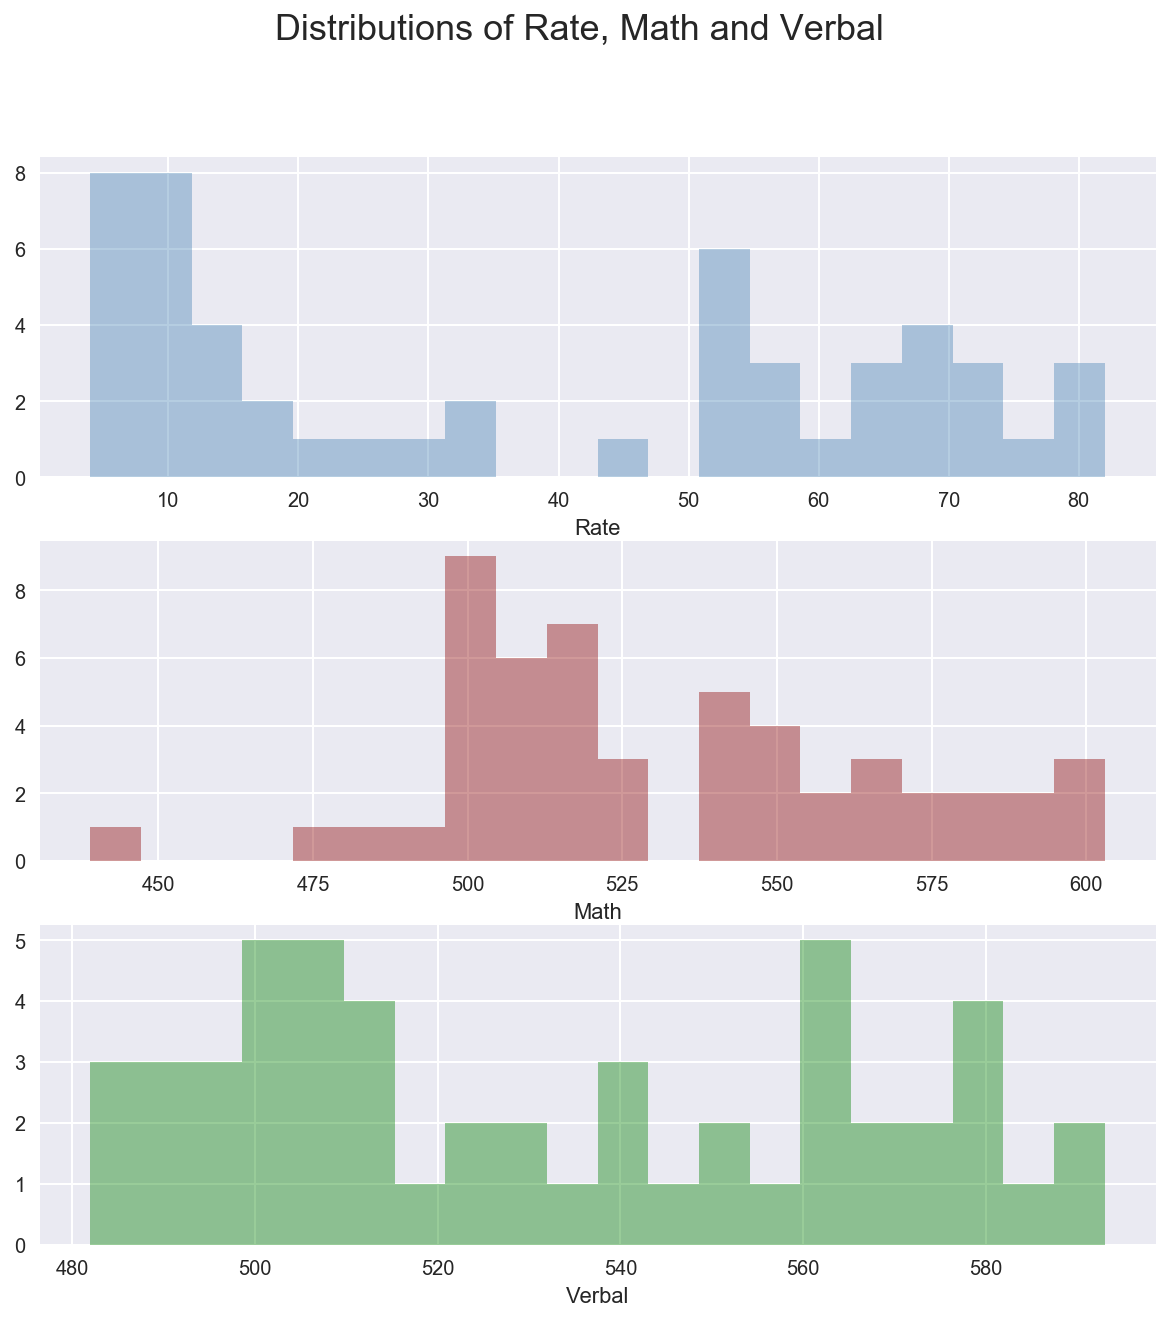

In [146]:
fig, ax = plt.subplots(3,1, figsize=(10,10))

sns.distplot(df_sat['Rate'], bins=20, kde=False, color='steelblue', ax=ax[0])
sns.distplot(df_sat['Math'], bins=20, kde=False, color='darkred', ax=ax[1])
sns.distplot(df_sat['Verbal'], bins=20, kde=False, color='green', ax=ax[2])

fig = fig.suptitle('Distributions of Rate, Math and Verbal', fontsize=18)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

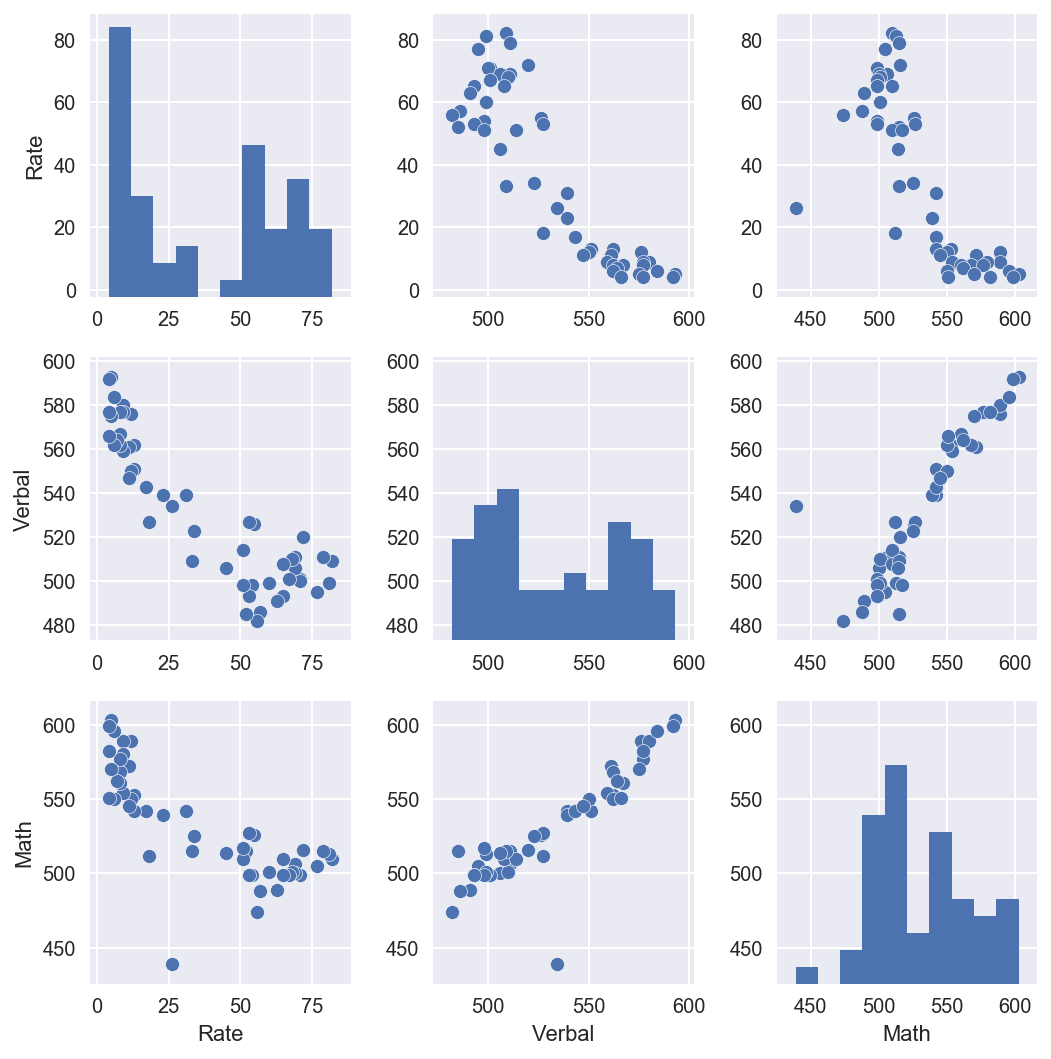

In [147]:
sns.pairplot(df_sat)

__Observations from pairplot:__
- Math & Verbal appear to be positively correlated
- Rate & Verbal, Rate & Math appear to be negatively correlated

Need to investigate more

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

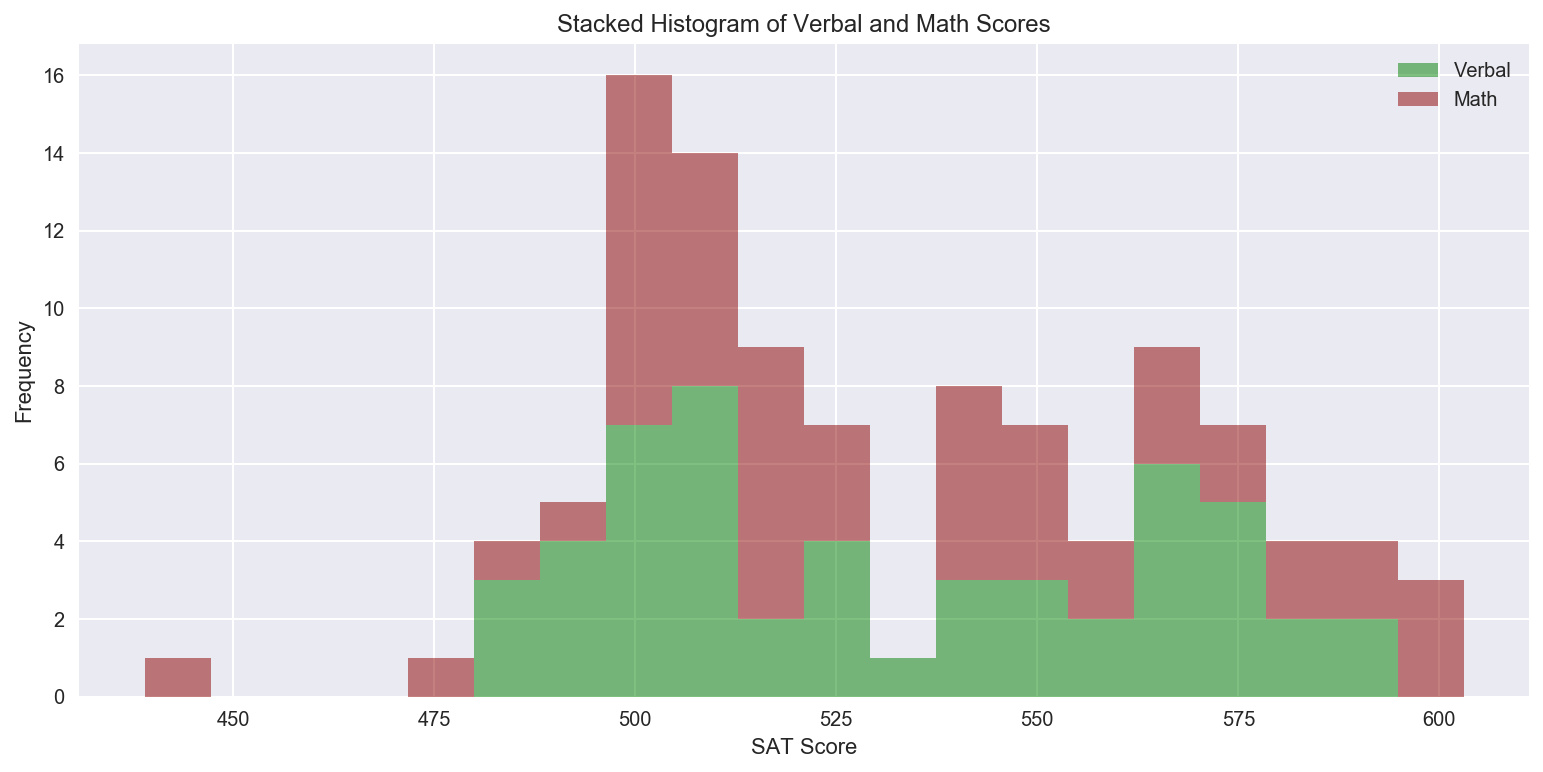

In [148]:
fig = plt.figure(figsize=(13,6))
ax = fig.gca()

ax = df_sat[['Verbal', 'Math']].plot.hist(stacked=True, bins=20, ax=ax, color=['green', 'darkred'], alpha=0.5)
ax = plt.xlabel('SAT Score')
ax = plt.title('Stacked Histogram of Verbal and Math Scores')

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

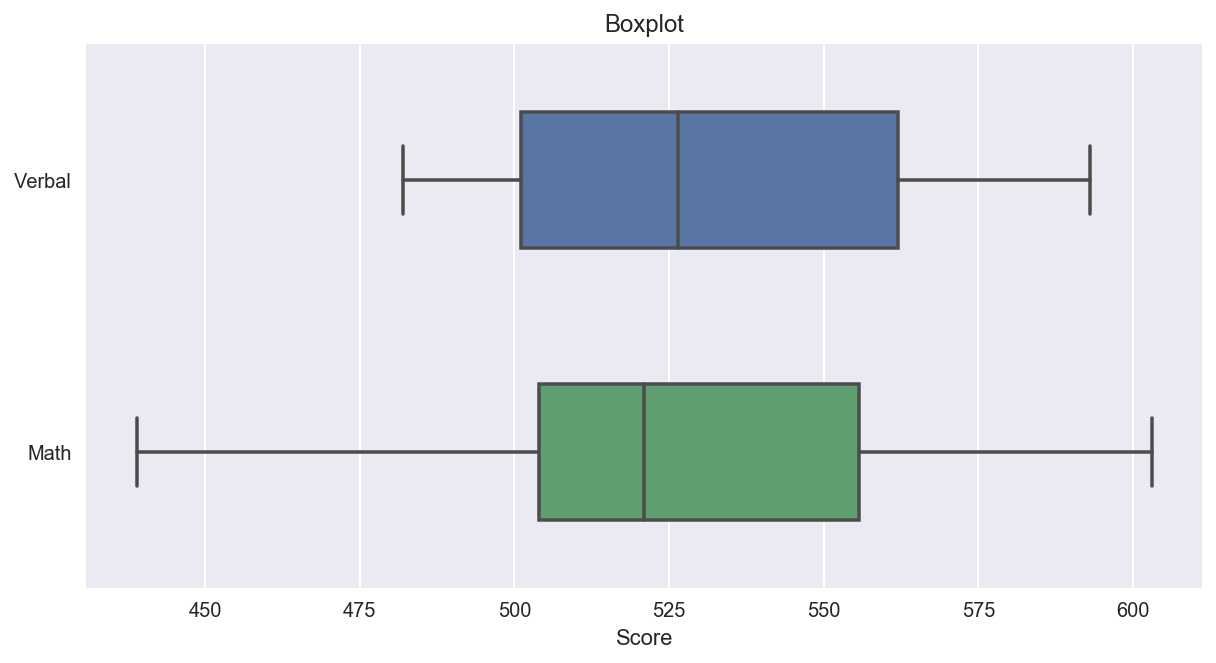

In [149]:
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

sns.boxplot(data=df_sat[['Verbal', 'Math']], orient='h', width=0.5)
ax= plt.xlabel('Score')
ax= plt.title('Boxplot')

**Benefits of using Boxplot vs Histogram/ Scatter plot:**
- able to get a feel of the IQRs, spread of points
- easily identify outliers
- quickly compare median values

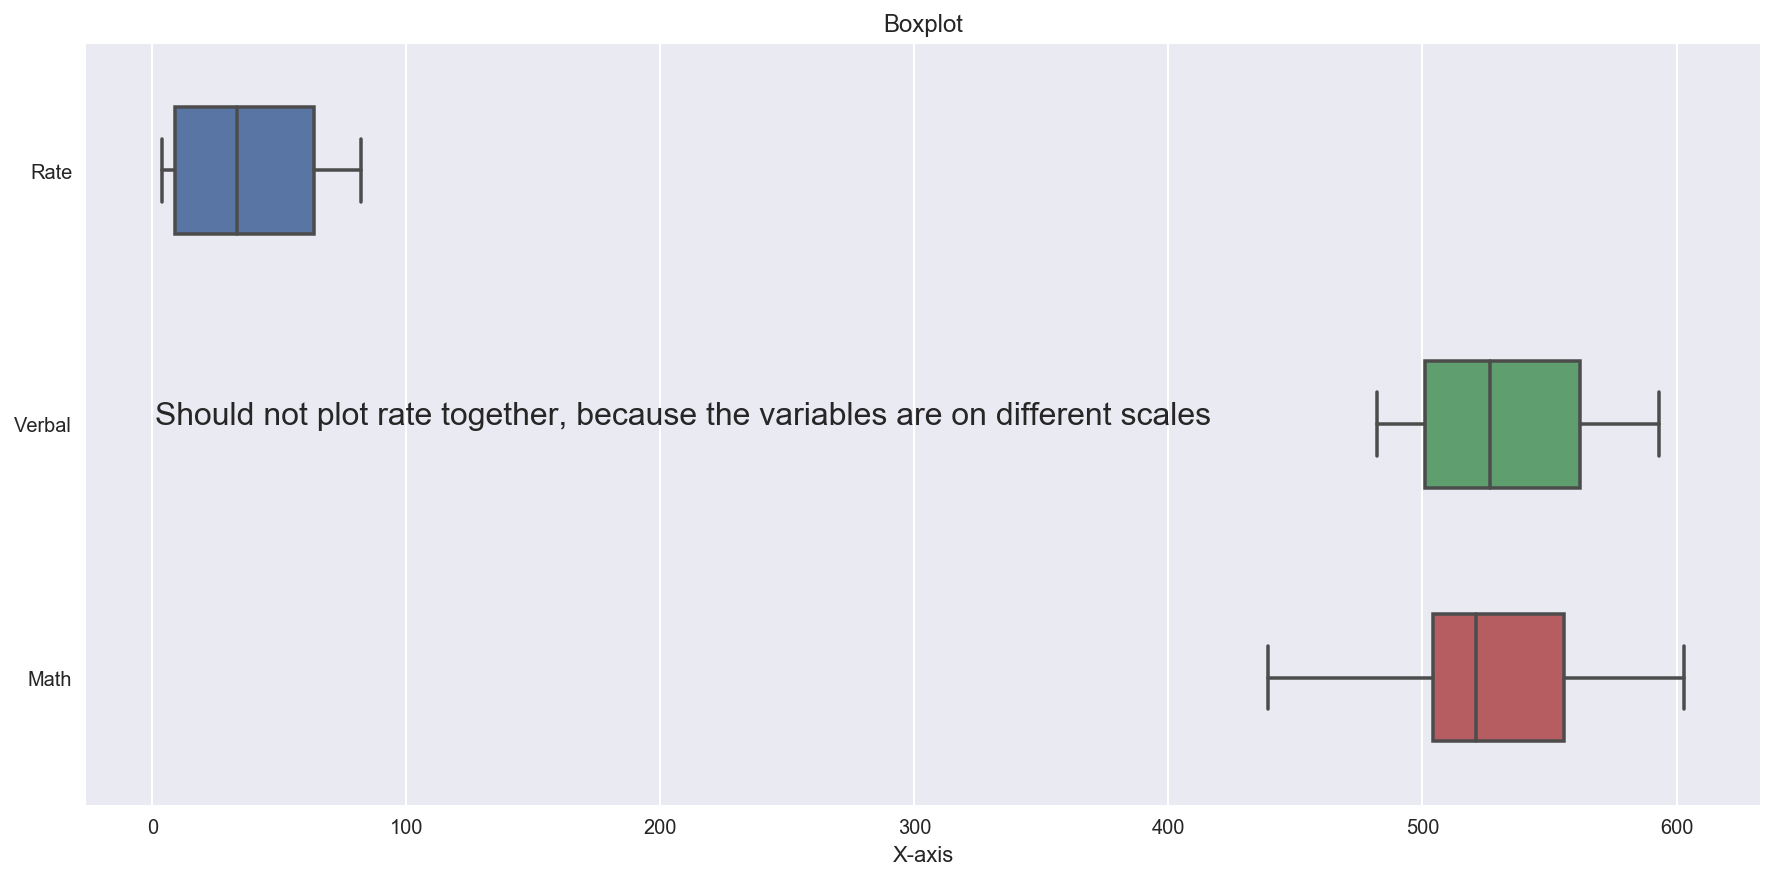

In [150]:
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

sns.boxplot(data=df_sat, orient='h', width=0.5)
ax= plt.xlabel('X-axis')
ax= plt.title('Boxplot')
ax= plt.text(x=1, y=1, s='Should not plot rate together, because the variables are on different scales', fontsize=16)

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


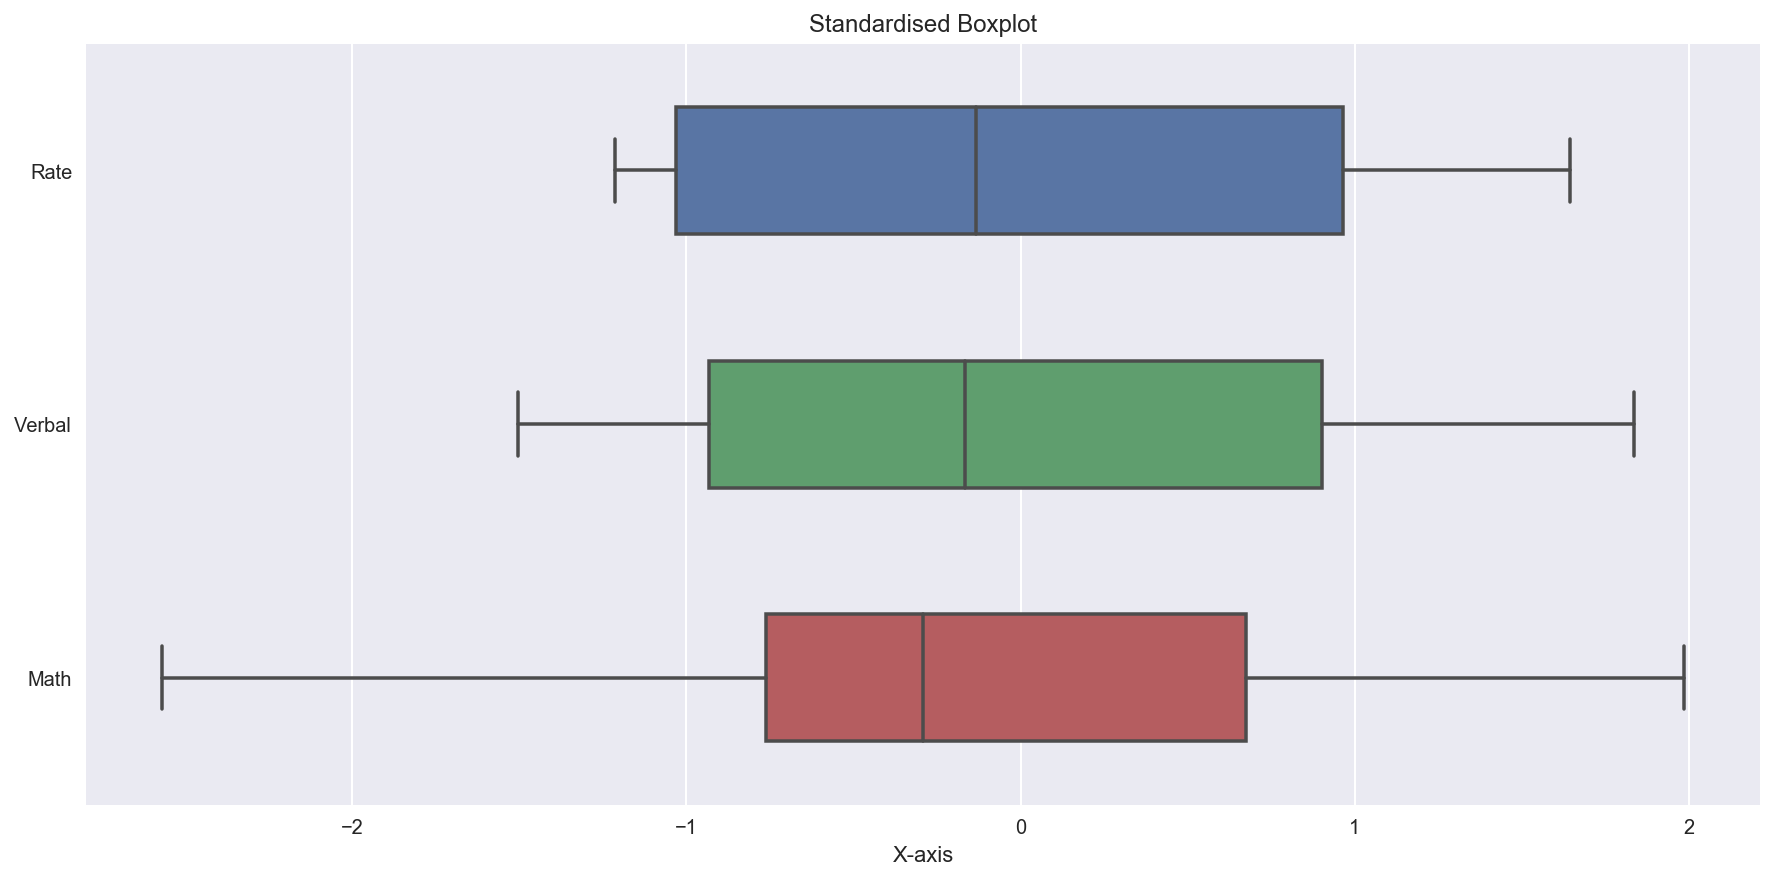

In [151]:
# standarddise variables
df_sat_std = (df_sat[['Rate', 'Verbal', 'Math']] - df_sat.mean()) / df_sat.std()

# redo boxplot with standardised variables
fig = plt.figure(figsize=(15, 7))
ax = fig.gca()

sns.boxplot(data=df_sat_std, orient='h', width=0.5)
ax= plt.xlabel('X-axis')
ax= plt.title('Standardised Boxplot')

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [152]:
print 'Mean: ', df_sat['Verbal'].mean()
df_sat[df_sat['Verbal']>df_sat['Verbal'].mean()].sort_values(by='Verbal')

Mean:  532.019230769


,State,Rate,Verbal,Math
27,OH,26,534,439
26,CO,31,539,542
28,MT,23,539,539
30,ID,17,543,542
35,WY,11,547,545
34,KY,12,550,550
32,NM,13,551,542
39,AL,9,559,554
36,MI,11,561,572
31,TN,13,562,553


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [153]:
print 'Median: ', df_sat['Verbal'].median()
df_sat[df_sat['Verbal']>df_sat['Verbal'].median()].sort_values(by='Verbal')

## This list is longer by 2 states, because the median is lower than the mean.

Median:  526.5


,State,Rate,Verbal,Math
19,WA,53,527,527
29,WV,18,527,512
27,OH,26,534,439
26,CO,31,539,542
28,MT,23,539,539
30,ID,17,543,542
35,WY,11,547,545
34,KY,12,550,550
32,NM,13,551,542
39,AL,9,559,554


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [154]:
df_sat['Diff'] = df_sat['Verbal'] - df_sat['Math']
df_sat.head()

,State,Rate,Verbal,Math,Diff
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [155]:
# greatest gap, Verbal > Math
dfsub1= df_sat.sort_values('Diff', ascending=False).head(10)
dfsub1.head(3)

,State,Rate,Verbal,Math,Diff
27,OH,26,534,439,95
50,MS,4,566,551,15
29,WV,18,527,512,15


In [156]:
# greatest gap, Math > Verbal
dfsub2 = df_sat.sort_values('Diff').head(10)
dfsub2.head(3)

,State,Rate,Verbal,Math,Diff
21,HI,52,485,515,-30
23,CA,51,498,517,-19
1,NJ,81,499,513,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [157]:
# start from clean slate
df_sat = pd.read_csv(sat_path)

df_sat.corr()

,Rate,Verbal,Math
Rate,1.000000,-0.886432,-0.773746
Verbal,-0.886432,1.000000,0.899871
Math,-0.773746,0.899871,1.000000


**Pearson correlation matrix shows that:**
- Rate is negatively correlated to Verbal & Math - aka. States with the lowest rate of taking the SATs do better
- Verbal & Math are strongly positively correlated - aka. kids that do well in one are likely to do well in the other.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [158]:
df_sat.describe(include='all')

,State,Rate,Verbal,Math
count,52,52.000000,52.000000,52.000000
unique,52,NaN,NaN,NaN
top,SD,NaN,NaN,NaN
freq,1,NaN,NaN,NaN
mean,NaN,37.153846,532.019231,531.500000
std,NaN,27.301788,33.236225,36.014975
min,NaN,4.000000,482.000000,439.000000
25%,NaN,9.000000,501.000000,504.000000
50%,NaN,33.500000,526.500000,521.000000
75%,NaN,63.500000,562.000000,555.750000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [159]:
df_cov = df_sat.cov()
df_cov

,Rate,Verbal,Math
Rate,745.387632,-804.355958,-760.803922
Verbal,-804.355958,1104.646682,1077.147059
Math,-760.803922,1077.147059,1297.078431


1. Difference: The covariance matrix is a measure of how related the variables are to each other, but is relative to the variance of the variables. The correlation matrix on the other hand is scaled between -1 and +1

2. Conversion between the 2 can be done using the following formula:
$$ corr(X, Y) = \frac{cov(X, Y)}{std(X)std(Y)} $$

3. It is hard to compare the values in the covariance matrix, much easier to compare the standardised values in the correlation matrix.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1

Load the data using pandas. Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [160]:
drugs = pd.read_csv('./drug-use-by-age.csv')

# allow all the columns to be displayed
pd.set_option('max_columns', 30)

In [161]:
print drugs.shape
drugs.head()

(17, 28)


,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,0.1,35.5,0.2,52.0,1.6,19.0,2.0,36.0,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,0.0,-,0.6,6.0,2.5,12.0,2.4,14.0,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,0.1,2.0,1.6,3.0,2.6,5.0,3.9,12.0,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,0.2,1.0,2.1,4.0,2.5,5.5,5.5,10.0,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,0.1,66.5,3.4,3.0,3.0,3.0,6.2,7.0,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0


In [162]:
drugs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 28 columns):
age                        17 non-null object
n                          17 non-null int64
alcohol-use                17 non-null float64
alcohol-frequency          17 non-null float64
marijuana-use              17 non-null float64
marijuana-frequency        17 non-null float64
cocaine-use                17 non-null float64
cocaine-frequency          17 non-null object
crack-use                  17 non-null float64
crack-frequency            17 non-null object
heroin-use                 17 non-null float64
heroin-frequency           17 non-null object
hallucinogen-use           17 non-null float64
hallucinogen-frequency     17 non-null float64
inhalant-use               17 non-null float64
inhalant-frequency         17 non-null object
pain-releiver-use          17 non-null float64
pain-releiver-frequency    17 non-null float64
oxycontin-use              17 non-null float64
oxycontin-f

In [163]:
drugs.isnull().sum()
# there are no null values at this point

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          0
crack-use                  0
crack-frequency            0
heroin-use                 0
heroin-frequency           0
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         0
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        0
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             0
sedative-use               0
sedative-frequency         0
dtype: int64

In [164]:
# inspect the columns that are objects
print drugs['age'].unique() # some ages are a range, ok

# for all the frequency cols, replace - by NaN, convert to float 
# choose to use NaN because we are not applying ML methods yet, so won't mess with any algorithm
print drugs['cocaine-frequency'].unique() 
print drugs['crack-frequency'].unique()
print drugs['heroin-frequency'].unique()

drugs.replace('-', np.nan, inplace=True)
drugs.iloc[:,2:] = drugs.iloc[:, 2:].astype(float)
drugs.dtypes

['12' '13' '14' '15' '16' '17' '18' '19' '20' '21' '22-23' '24-25' '26-29'
 '30-34' '35-49' '50-64' '65+']
['5.0' '1.0' '5.5' '4.0' '7.0' '8.0' '6.0' '15.0' '36.0' '-']
['-' '3.0' '9.5' '1.0' '21.0' '10.0' '2.0' '5.0' '17.0' '6.0' '15.0' '48.0'
 '62.0']
['35.5' '-' '2.0' '1.0' '66.5' '64.0' '46.0' '180.0' '45.0' '30.0' '57.5'
 '88.0' '50.0' '66.0' '280.0' '41.0' '120.0']


age                         object
n                            int64
alcohol-use                float64
alcohol-frequency          float64
marijuana-use              float64
marijuana-frequency        float64
cocaine-use                float64
cocaine-frequency          float64
crack-use                  float64
crack-frequency            float64
heroin-use                 float64
heroin-frequency           float64
hallucinogen-use           float64
hallucinogen-frequency     float64
inhalant-use               float64
inhalant-frequency         float64
pain-releiver-use          float64
pain-releiver-frequency    float64
oxycontin-use              float64
oxycontin-frequency        float64
tranquilizer-use           float64
tranquilizer-frequency     float64
stimulant-use              float64
stimulant-frequency        float64
meth-use                   float64
meth-frequency             float64
sedative-use               float64
sedative-frequency         float64
dtype: object

In [165]:
drugs.isnull().sum()
# now there are some null values

age                        0
n                          0
alcohol-use                0
alcohol-frequency          0
marijuana-use              0
marijuana-frequency        0
cocaine-use                0
cocaine-frequency          1
crack-use                  0
crack-frequency            3
heroin-use                 0
heroin-frequency           1
hallucinogen-use           0
hallucinogen-frequency     0
inhalant-use               0
inhalant-frequency         1
pain-releiver-use          0
pain-releiver-frequency    0
oxycontin-use              0
oxycontin-frequency        1
tranquilizer-use           0
tranquilizer-frequency     0
stimulant-use              0
stimulant-frequency        0
meth-use                   0
meth-frequency             2
sedative-use               0
sedative-frequency         0
dtype: int64

In [166]:
# now that everything except age is numeric, describe dataset
drugs.describe()
# looks like there is nothing strange... all the 'use' cols are within the 0-100% range,
# none of the 'frequency' cols exceed 365days, all positive

,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,heroin-use,heroin-frequency,hallucinogen-use,hallucinogen-frequency,inhalant-use,inhalant-frequency,pain-releiver-use,pain-releiver-frequency,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
count,17.000000,17.000000,17.000000,17.000000,17.000000,17.000000,16.000000,17.000000,14.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,16.000000,17.000000,17.000000,17.000000,17.000000,17.000000,15.000000,17.000000,17.000000
mean,3251.058824,55.429412,33.352941,18.923529,42.941176,2.176471,7.875000,0.294118,15.035714,0.352941,73.281250,3.394118,8.411765,1.388235,6.156250,6.270588,14.705882,0.935294,14.812500,2.805882,11.735294,1.917647,31.147059,0.382353,35.966667,0.282353,19.382353
std,1297.890426,26.878866,21.318833,11.959752,18.362566,1.816772,8.038449,0.235772,18.111263,0.333762,70.090173,2.792506,15.000245,0.927283,4.860448,3.166379,6.935098,0.608216,12.798275,1.753379,11.485205,1.407673,85.973790,0.262762,31.974581,0.138000,24.833527
min,2223.000000,3.900000,3.000000,1.100000,4.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.100000,2.000000,0.000000,2.000000,0.600000,7.000000,0.000000,3.000000,0.200000,4.500000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000
25%,2469.000000,40.100000,10.000000,8.700000,30.000000,0.500000,5.000000,0.000000,5.000000,0.100000,39.625000,0.600000,3.000000,0.600000,3.375000,3.900000,12.000000,0.400000,5.750000,1.400000,6.000000,0.600000,7.000000,0.200000,12.000000,0.200000,6.500000
50%,2798.000000,64.600000,48.000000,20.800000,52.000000,2.000000,5.250000,0.400000,7.750000,0.200000,53.750000,3.200000,3.000000,1.400000,4.000000,6.200000,12.000000,1.100000,12.000000,3.500000,10.000000,1.800000,10.000000,0.400000,30.000000,0.300000,10.000000
75%,3058.000000,77.500000,52.000000,28.400000,52.000000,4.000000,7.250000,0.500000,16.500000,0.600000,71.875000,5.200000,4.000000,2.000000,6.625000,9.000000,15.000000,1.400000,18.125000,4.200000,11.000000,3.000000,12.000000,0.600000,47.000000,0.400000,17.500000
max,7391.000000,84.200000,52.000000,34.000000,72.000000,4.900000,36.000000,0.600000,62.000000,1.100000,280.000000,8.600000,52.000000,3.000000,19.000000,10.000000,36.000000,1.700000,46.000000,5.400000,52.000000,4.100000,364.000000,0.900000,105.000000,0.500000,104.000000


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

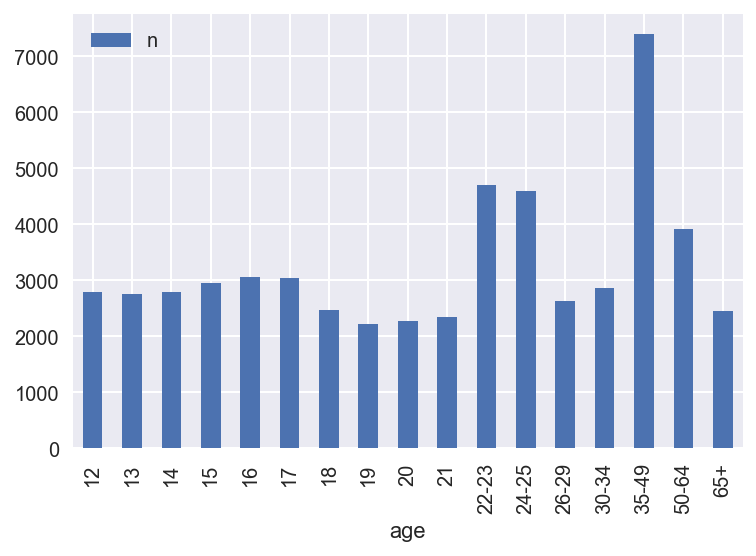

In [167]:
# x: age group, y: n -> get an idea of the population who did the survey
_ = drugs.plot(x='age', y='n', kind='bar')
# a lot of people in the 35-49 age range took the survey, the age ranges are not even!

In [168]:
# form 2 dataframes for use & frequency respectively
use = pd.DataFrame()
freq = pd.DataFrame()

for col in drugs.iteritems():
    if col[0] in 'age':
        use[col[0]] = col[1]
        freq[col[0]]= col[1]    
    elif '-use' in col[0]:
        use[col[0]] = col[1]
    elif '-frequency' in col[0]:
        freq[col[0]]= col[1]
        
print use.shape, freq.shape

(17, 14) (17, 14)


In [169]:
# what is the highest percentage use of the drugs in general?
use.mean().sort_values(ascending=False)

alcohol-use          55.429412
marijuana-use        18.923529
pain-releiver-use     6.270588
hallucinogen-use      3.394118
tranquilizer-use      2.805882
cocaine-use           2.176471
stimulant-use         1.917647
inhalant-use          1.388235
oxycontin-use         0.935294
meth-use              0.382353
heroin-use            0.352941
crack-use             0.294118
sedative-use          0.282353
dtype: float64

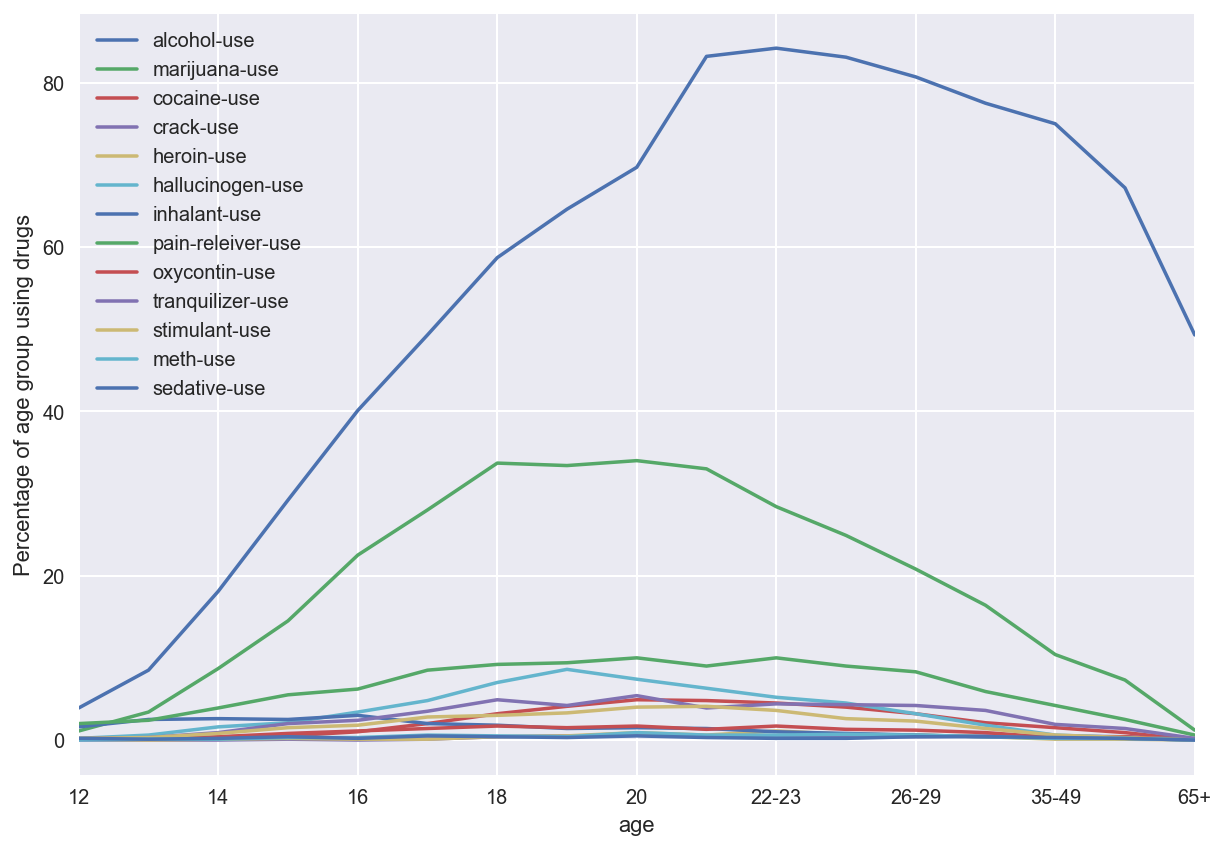

In [170]:
# x: age group, y: percentage who used drugs
_ = use.plot(x='age', figsize=(10,7))
_ = plt.ylabel('Percentage of age group using drugs')
# percentage of age group that uses alcohol far exceeds other drugs, followed by marijuana

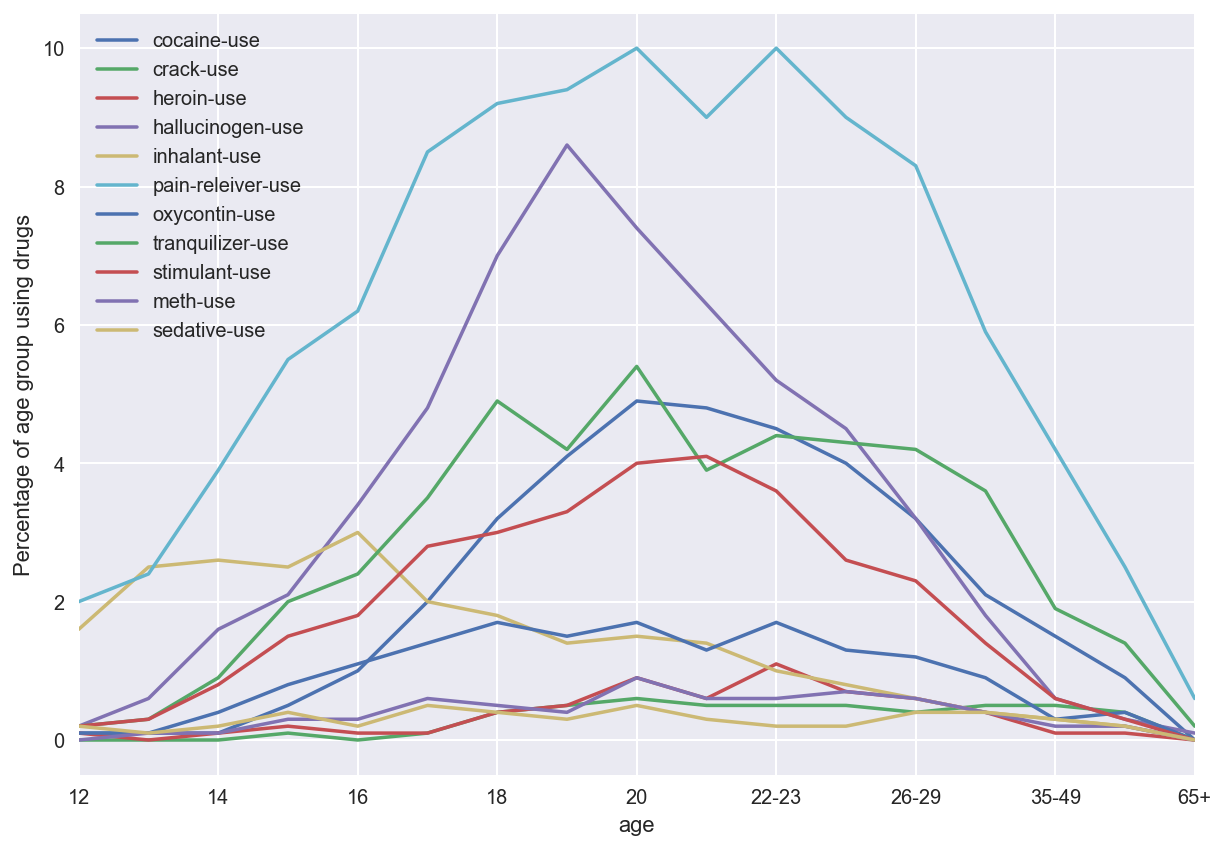

In [171]:
# exclude alcohol and marijuana, look at the rest of the drugs
use_c = use.drop(['alcohol-use', 'marijuana-use'], axis=1)
_ = use_c.plot(x='age', figsize=(10,7))
_ = plt.ylabel('Percentage of age group using drugs')
# generally, drug use appears to peak around age 20, except inhalant use

In [172]:
# what is the highest median frequency of the drugs in general?
freq.mean().sort_values(ascending=False)
# although only a small percentage of people take heroin, those who do take it a lot

heroin-frequency           73.281250
marijuana-frequency        42.941176
meth-frequency             35.966667
alcohol-frequency          33.352941
stimulant-frequency        31.147059
sedative-frequency         19.382353
crack-frequency            15.035714
oxycontin-frequency        14.812500
pain-releiver-frequency    14.705882
tranquilizer-frequency     11.735294
hallucinogen-frequency      8.411765
cocaine-frequency           7.875000
inhalant-frequency          6.156250
dtype: float64

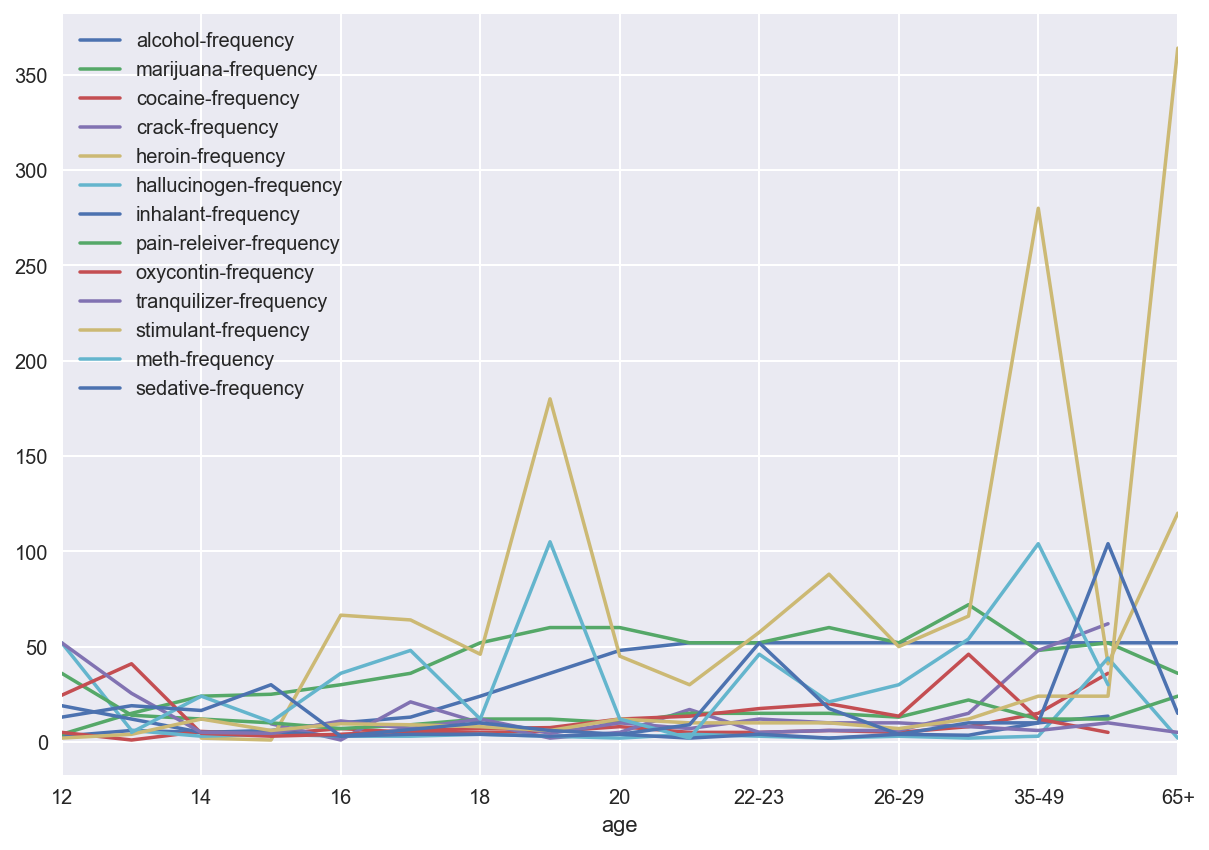

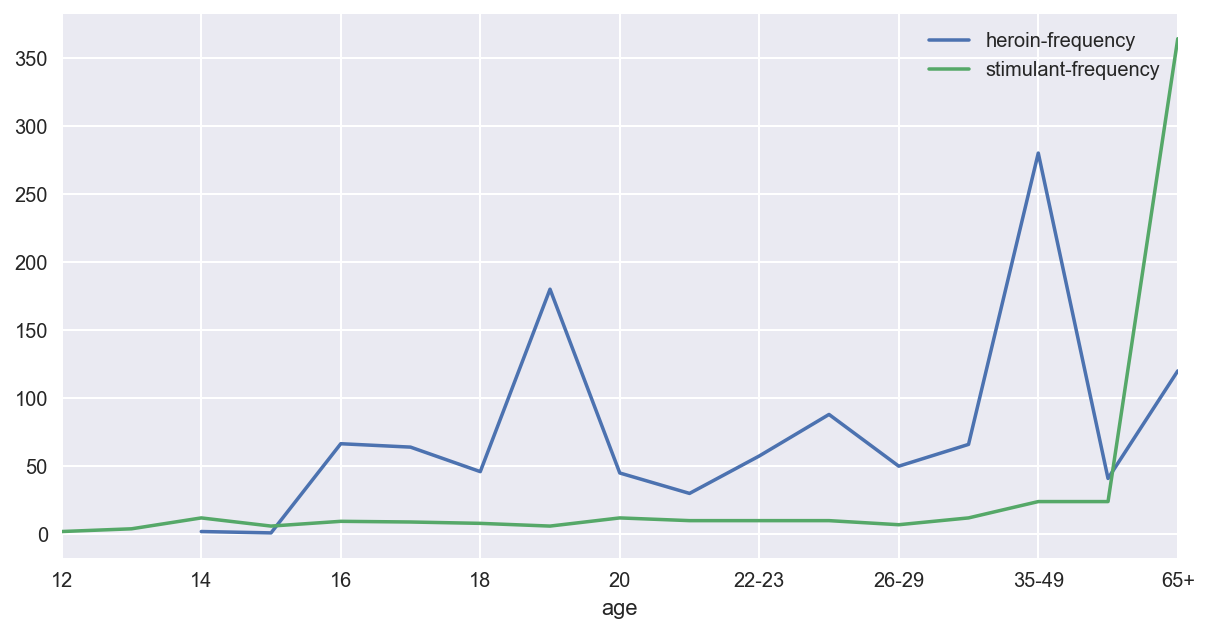

In [173]:
# x: age group, y: median frequency
_ = freq.plot(x='age', figsize=(10,7), kind='line')
_ = freq[['age', 'heroin-frequency', 'stimulant-frequency']].plot(x='age', figsize=(10,5), kind='line')
# somehow the old folks use a lot of stimulants, and 19 year olds have strangely good access to heroin

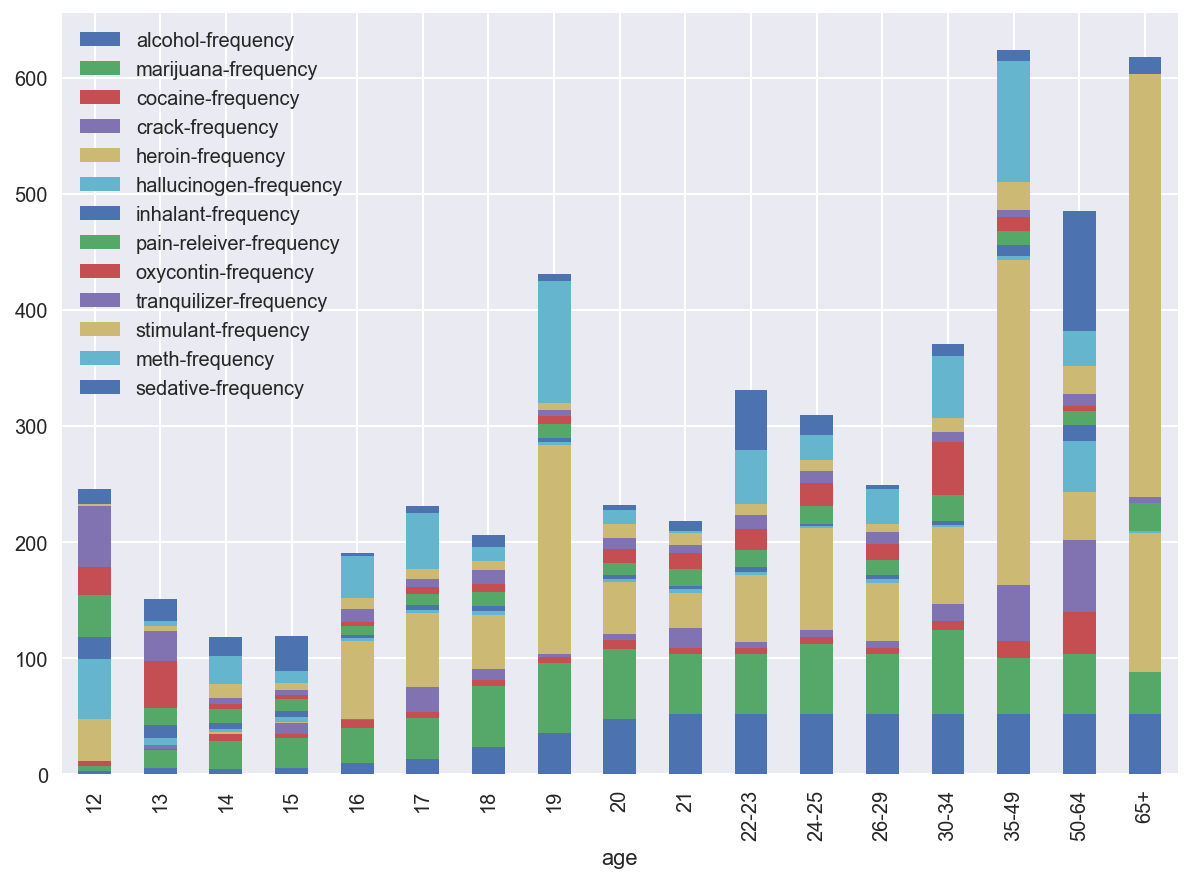

In [174]:
# x: age group, y: median frequency
_ = freq.plot(x='age', figsize=(10,7), kind='bar', stacked=True)
# the frequency of taking drugs in general appears to increase with age

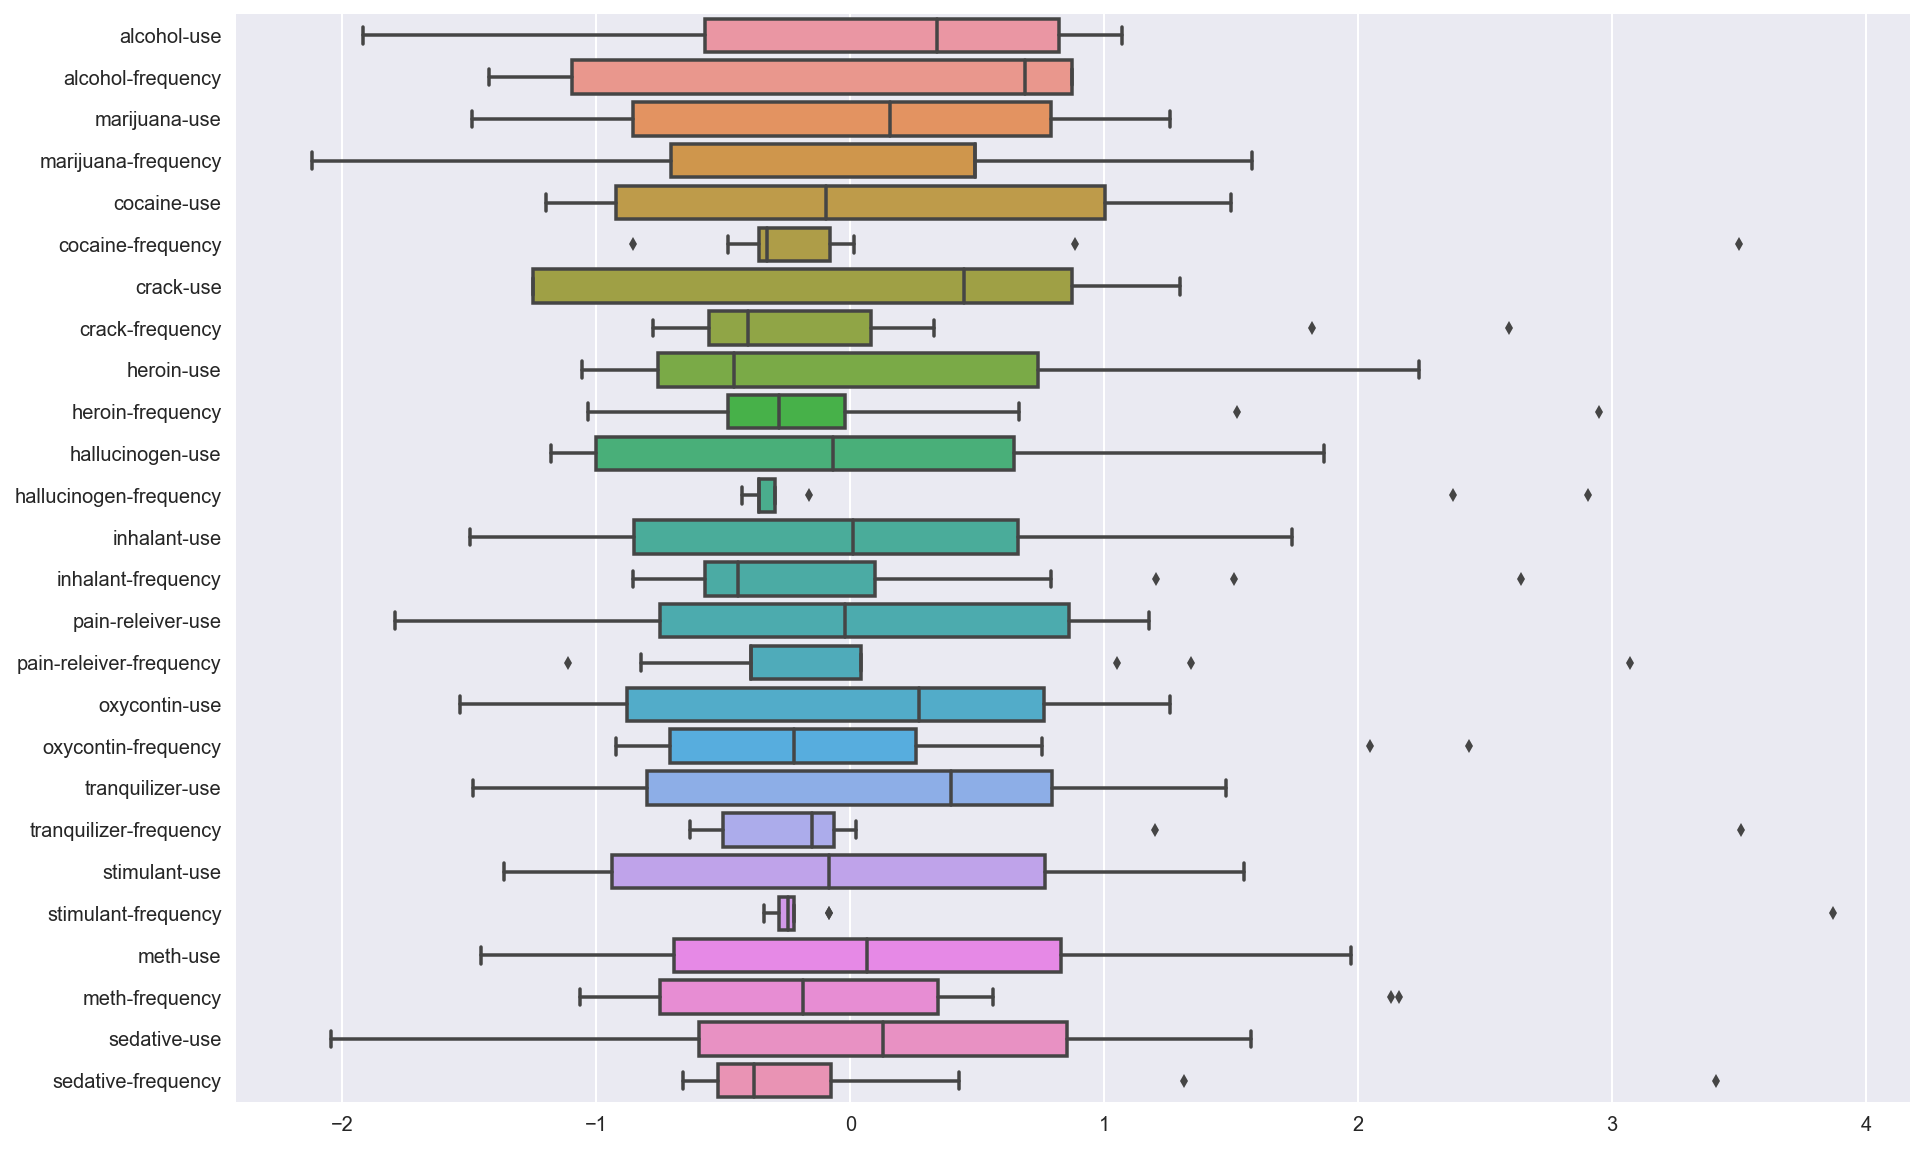

In [175]:
# box plot of the various drugs, standardised
drugs_num = drugs.drop(['age', 'n'], axis=1)
drugs_num = (drugs_num - drugs_num.mean()) / drugs_num.std()

fig = plt.figure(figsize=(15,10))
sns.boxplot(data=drugs_num, orient='h')
# there are quite a lot of outliers in the dataset...

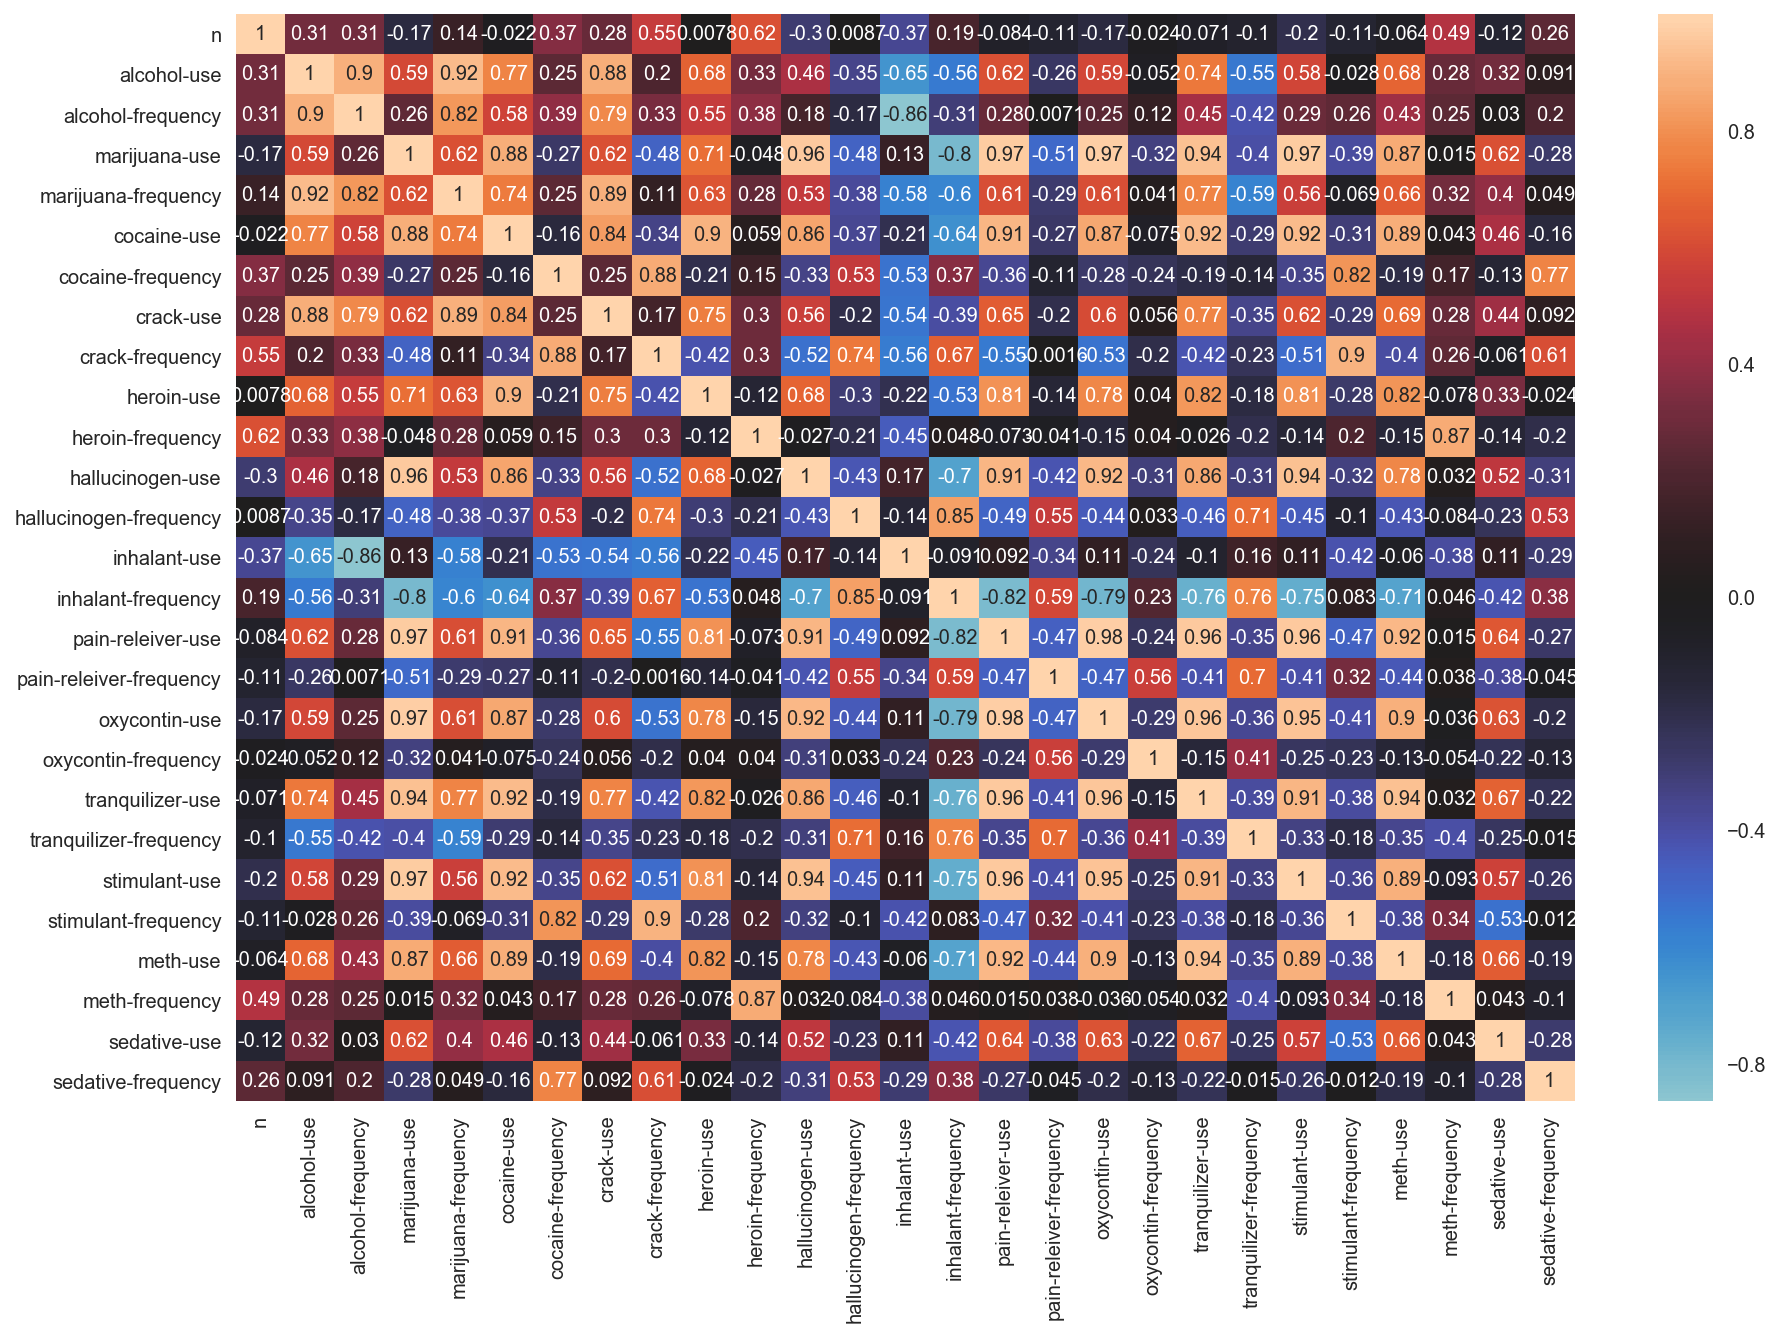

In [176]:
use.drop('age', axis=1, inplace=True)
freq.drop('age', axis=1, inplace=True)

fig = plt.figure(figsize=(15,10))
sns.heatmap(drugs.corr(), center =0, annot=True)
# Observations:
# Highly positvely correlated: alcohol-use & alcohol-freq...
# honestly this is way too hard to read... there are too many variables!

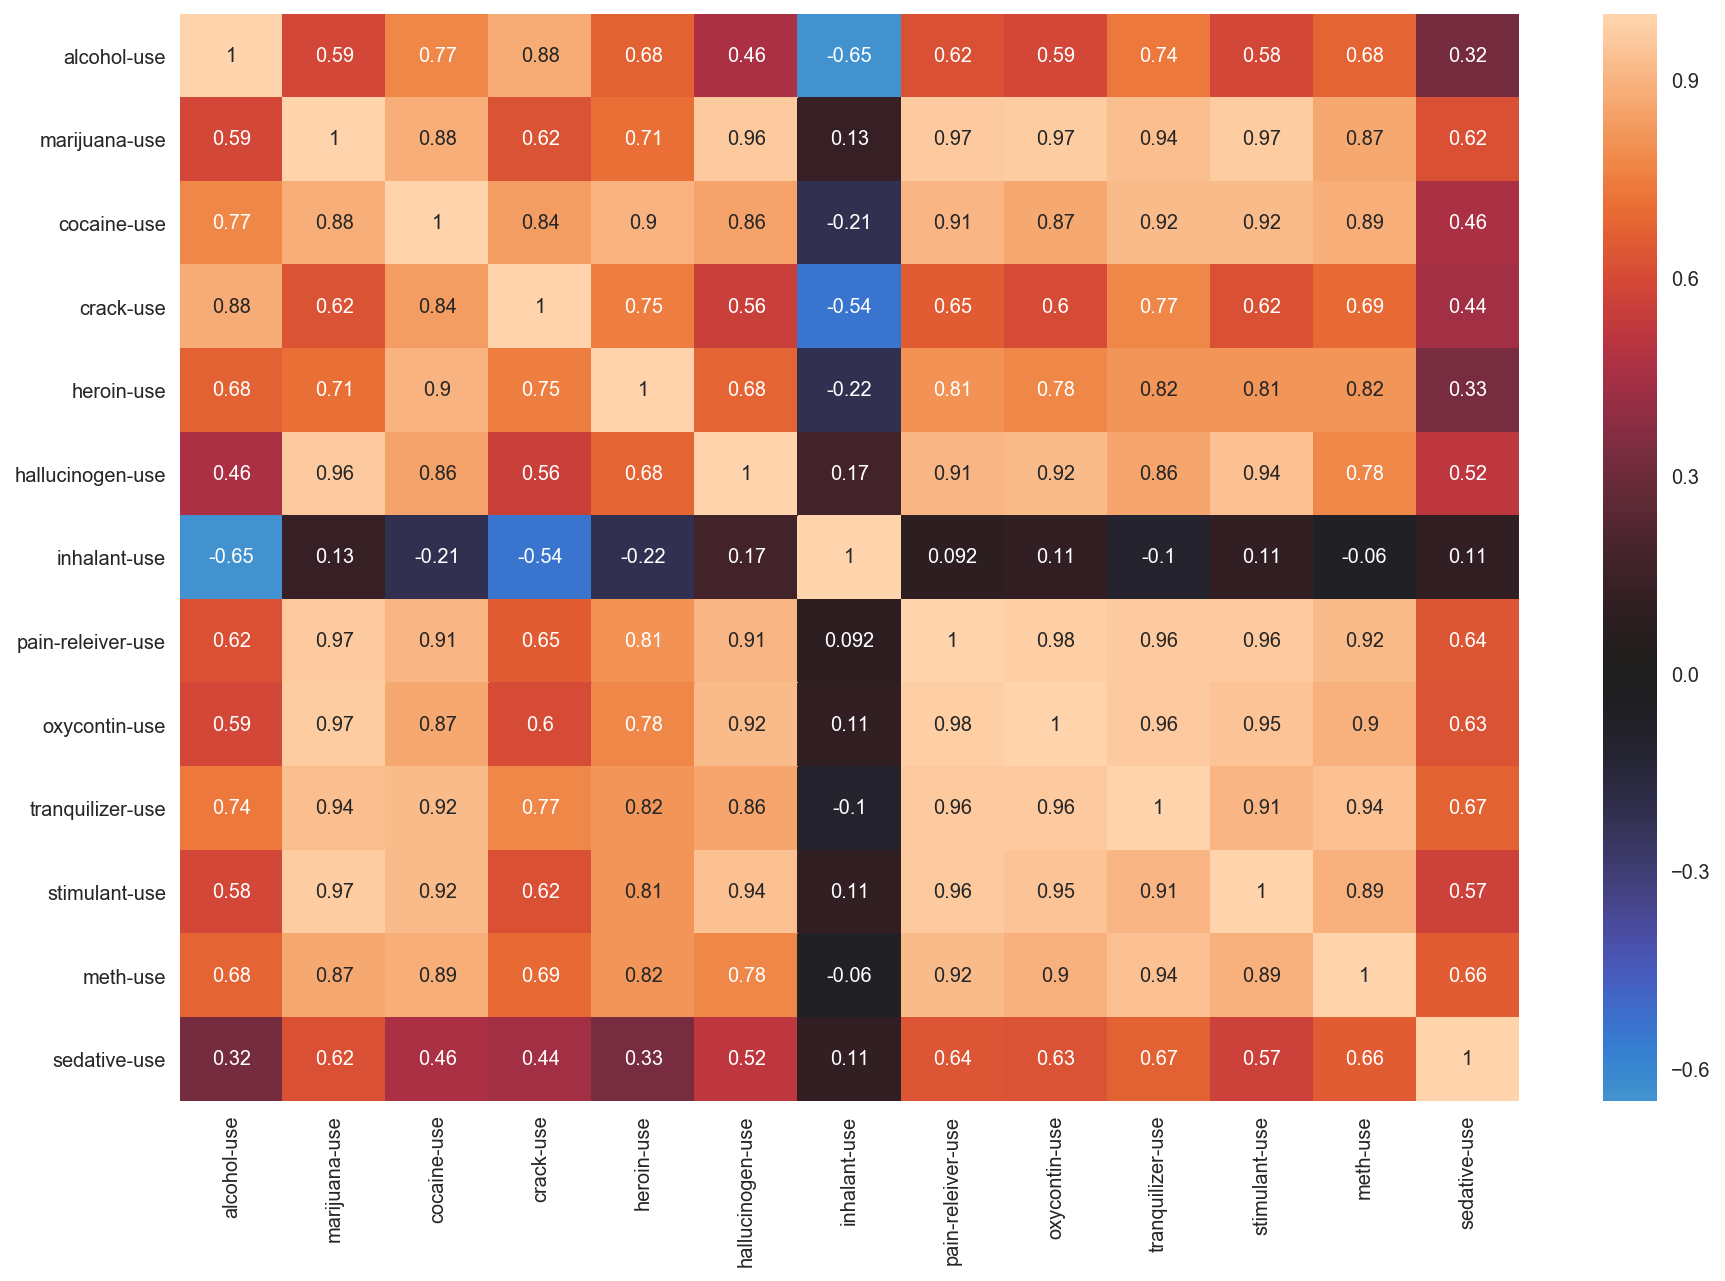

In [177]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(use.corr(), center=0, annot=True)
# Observations:
# - percentage of inhalant use is negatively correlated to alchohol use and crack use
# - alcohol use is most strongly correlated to crack use
# - marijuanna use is correlated to a whole bunch of drugs, except inhalents

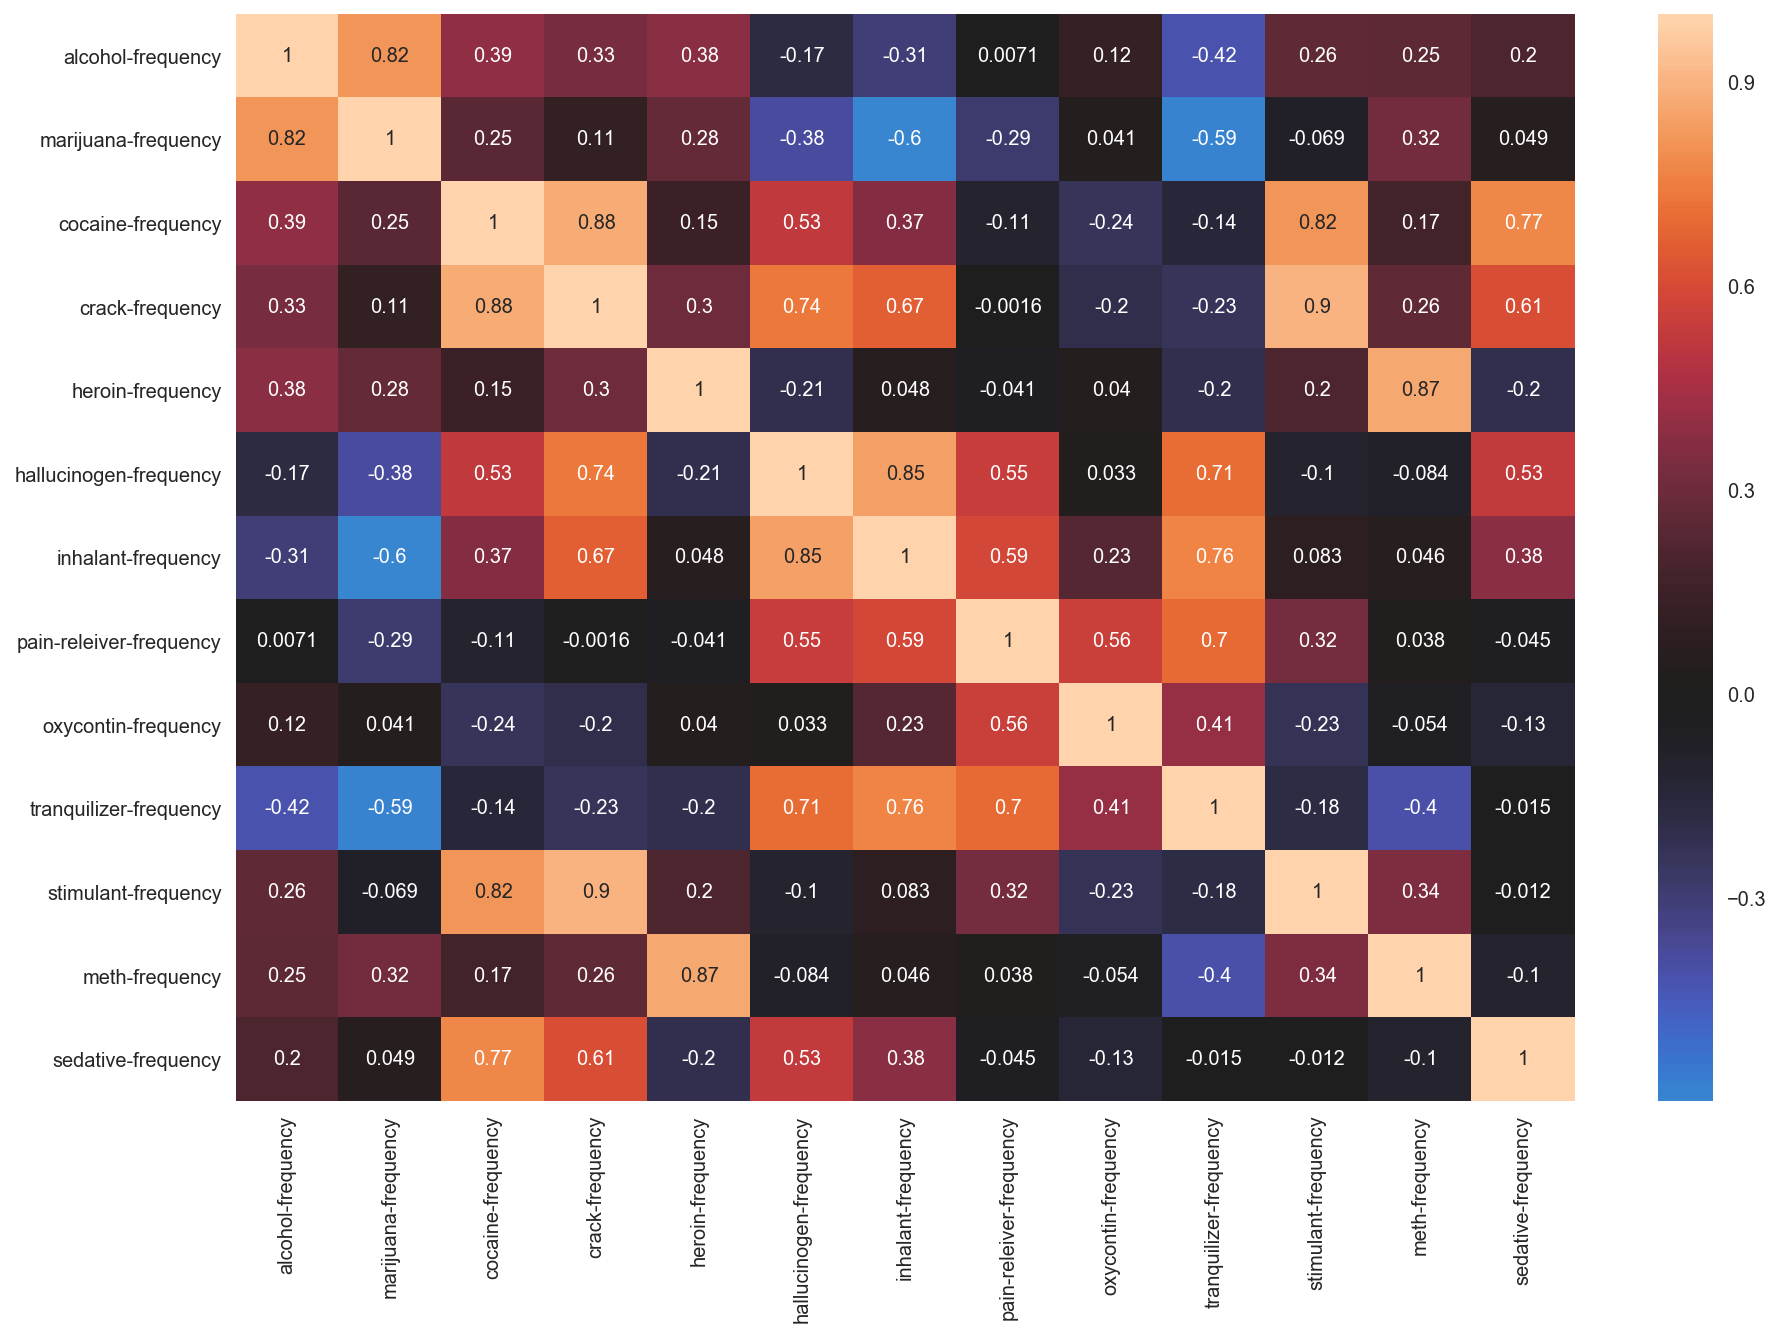

In [178]:
fig = plt.figure(figsize=(15,10))
sns.heatmap(freq.corr(), center=0, annot=True)
# Observations:
# - strongly positively correlated pairs: alcohol-marijuana, cocaine-crack, crack-stimulant, cocaine-stimulent, heroin-meth
# - moderately negatively corrrelated pairs: marijuana-inhalent, marijuana-tranquiliser

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

### Question & Deliverables

https://www.webmd.com/pain-management/news/20100830/marijuana-relieves-chronic-pain-research-show#1
Marijuana is used medically by some people for pain relief. 


**Question:** Is the use pattern of marijuana correlated with the use pattern of pain relievers? Interested in both:
1. use: percentage of those in the age group that used the drug in the past year
2. frequency: median number of times drug was used in the past year


**Deliverables:** 
- Scatter plots for visual feel of correlation
- Calculation of the pearson coefficient coefficient of this sample dataset
- Bootstrapping to get the 95% and 99% confidence interval for the pearson correlation coefficients


### Percentage Use:

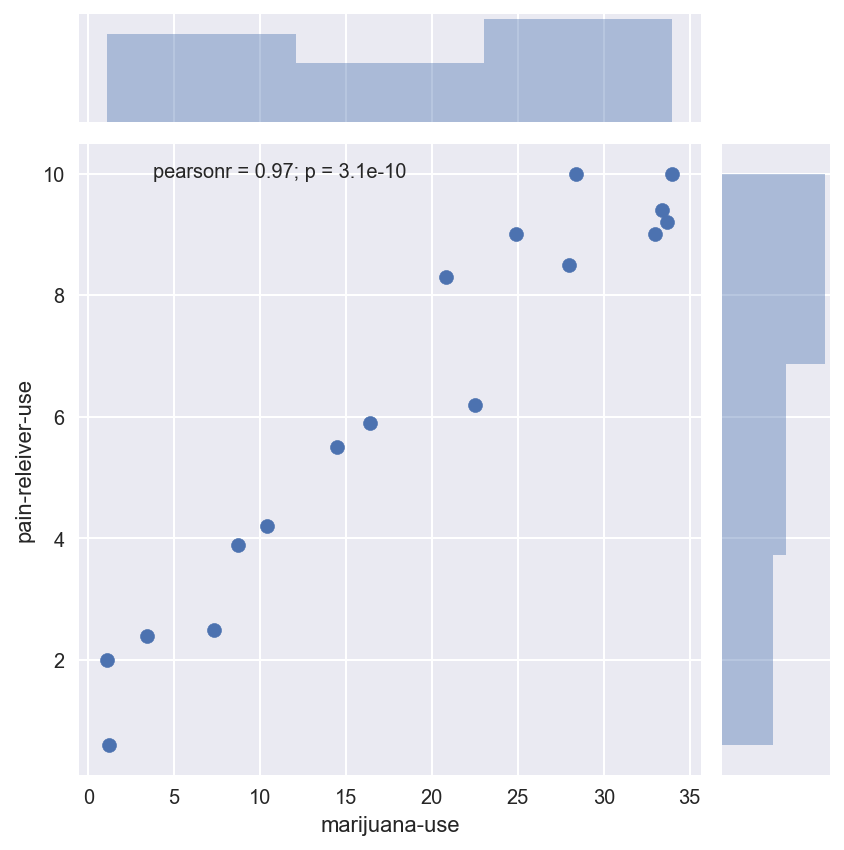

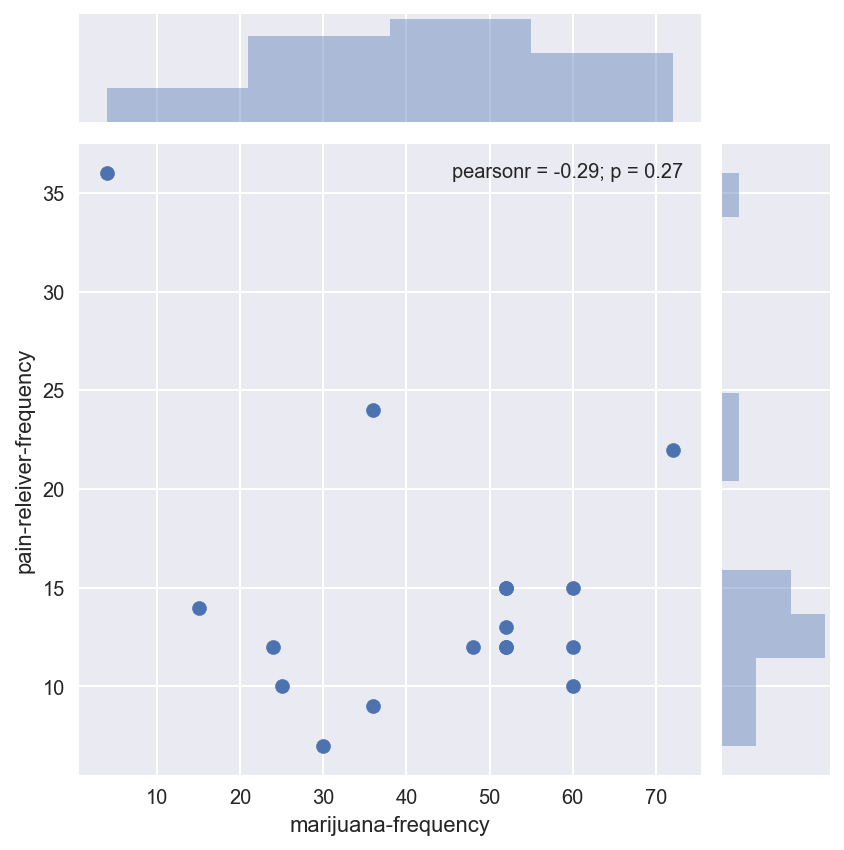

In [179]:
# scatter plot
_ = sns.jointplot(data=drugs, x='marijuana-use', y='pain-releiver-use')
_ = sns.jointplot(data=drugs, x='marijuana-frequency', y='pain-releiver-frequency')

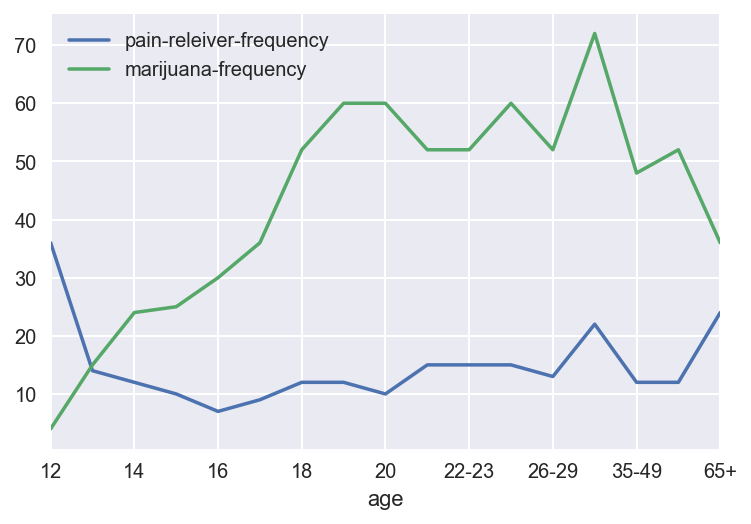

In [180]:
# plot frequency against age range to confirm that there doesn't seem to be a pattern
_ = drugs[['age', 'pain-releiver-frequency', 'marijuana-frequency']].plot(x='age')

In [181]:
# calculate the pearson correlation coefficient 
ru, pu = stats.pearsonr(drugs['marijuana-use'], drugs['pain-releiver-use'])
rf, pf = stats.pearsonr(drugs['marijuana-frequency'], drugs['pain-releiver-frequency'])


In [197]:
# set seed so results can be replicated
np.random.seed(45)

# define a bootstrap function for later use
def bootstrap(x, y, iters=1000):
    r=[]
    for i in range(iters):
        ind = np.random.choice(range(len(x)), size=len(x))
        x1 = x[ind]
        y1 = y[ind]
        r.append(np.corrcoef(x1, y1)[0][1])
    
    return r

# get the bootstrap samples
boot_ru = bootstrap(drugs['marijuana-use'], drugs['pain-releiver-use'])
boot_rf = bootstrap(drugs['marijuana-frequency'], drugs['pain-releiver-frequency'])

# calculate the confidence intervals, including the median for good measure
ci95u = np.percentile(boot_ru, [2.5, 50, 97.5])
ci99u = np.percentile(boot_ru, [.5, 50, 99.5])
ci95f = np.percentile(boot_rf, [2.5, 50, 97.5])
ci99f = np.percentile(boot_rf, [.5, 50, 99.5])

# print a report
print 'Percentage Use: '
print 'Sample correlation coefficient: ', ru
print 'P-value: ', pu
print '95% Confidence Interval', ci95u
print '99% Confidence Interval ', ci99u
print '--------------'
print 'Median Frequency:'
print 'Sample correlation coefficient: ', rf
print 'P-value: ', pf
print '95% Confidence Interval', ci95f
print '99% Confidence Interval ', ci99f

Percentage Use: 
Sample correlation coefficient:  0.966225865413
P-value:  3.06488579076e-10
95% Confidence Interval [ 0.93335268  0.96817753  0.98677304]
99% Confidence Interval  [ 0.91286889  0.96817753  0.99318388]
--------------
Median Frequency:
Sample correlation coefficient:  -0.28529224044
P-value:  0.267015869902
95% Confidence Interval [-0.7633026  -0.26168384  0.71002819]
99% Confidence Interval  [-0.86921611 -0.26168384  0.84191764]


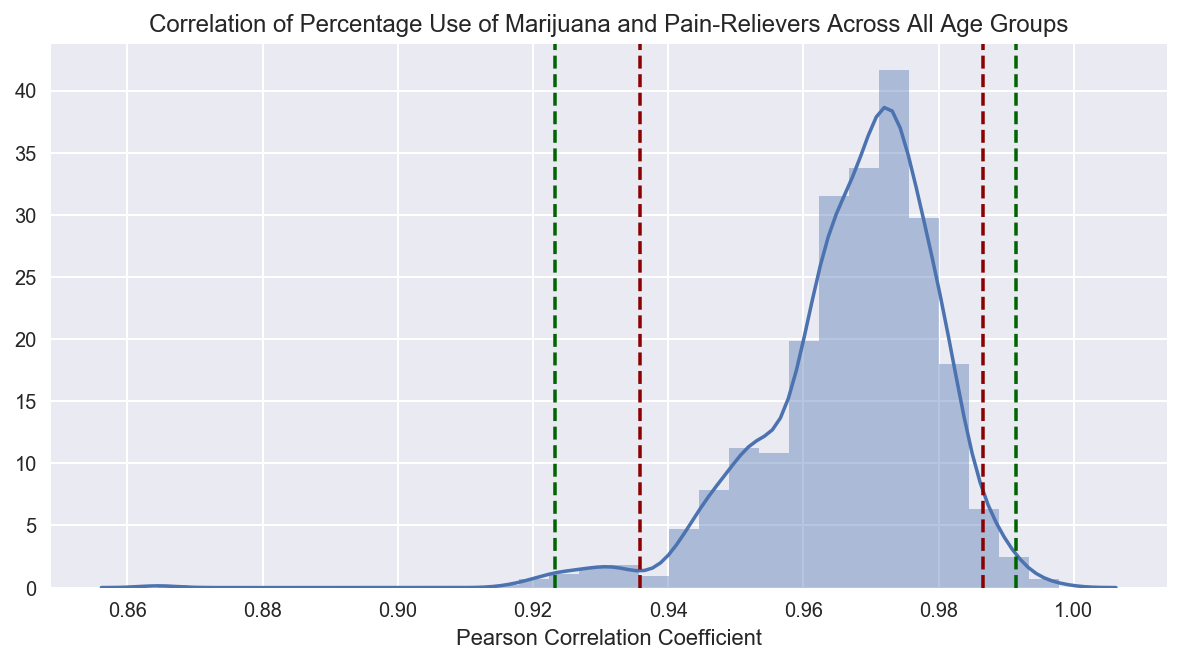

In [183]:
# plot for fun
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

sns.distplot(boot_ru, bins=30)
ax.axvline(ci95u[0], color='darkred', ls='dashed')
ax.axvline(ci95u[2], color='darkred', ls='dashed')
ax.axvline(ci99u[0], color='darkgreen', ls='dashed')
ax.axvline(ci99u[2], color='darkgreen', ls='dashed')
ax = plt.xlabel('Pearson Correlation Coefficient')
ax = plt.title('Correlation of Percentage Use of Marijuana and Pain-Relievers Across All Age Groups')


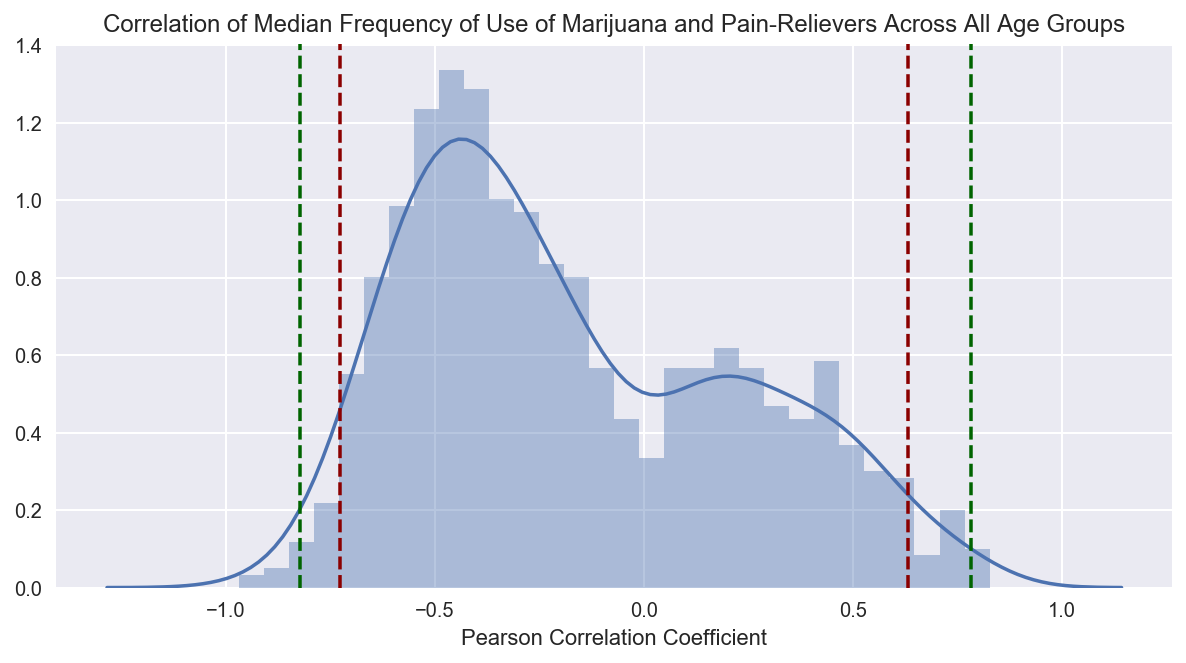

In [184]:
# plot for fun
fig = plt.figure(figsize=(10,5))
ax = fig.gca()

sns.distplot(boot_rf, bins=30)
ax.axvline(ci95f[0], color='darkred', ls='dashed')
ax.axvline(ci95f[2], color='darkred', ls='dashed')
ax.axvline(ci99f[0], color='darkgreen', ls='dashed')
ax.axvline(ci99f[2], color='darkgreen', ls='dashed')
ax = plt.xlabel('Pearson Correlation Coefficient')
ax = plt.title('Correlation of Median Frequency of Use of Marijuana and Pain-Relievers Across All Age Groups')


**Report**

_Percentage use:_ 
- There appears to be a positive linear correlation from the scatter plot
- The Pearson correlation coefficient is close to 1 : 0.966225865413
- The p-value is very small: 3.06488579076e-10
- The 99% confidence interval is [0.91286889, 0.99318388] > 0.9

Conclude that marijuana percentage use is positively correlated to pain reliever percentage use.

_Median Frequency:_ 
- There is no observable trend in the scatter plot
- The Pearson correlation coefficient is close to 0 :  -0.28529224044
- The P-value is large:  0.267015869902
- Both the 95% and 99% confidence intervals are very wide

No conclusion can be drawn regarding the relationship between the median frequency of taking marijuanna and pain relievers from this data.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000295A6518>]], dtype=object)

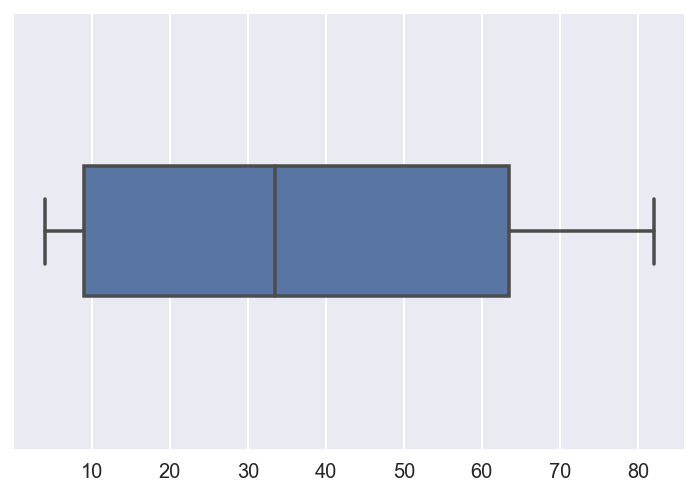

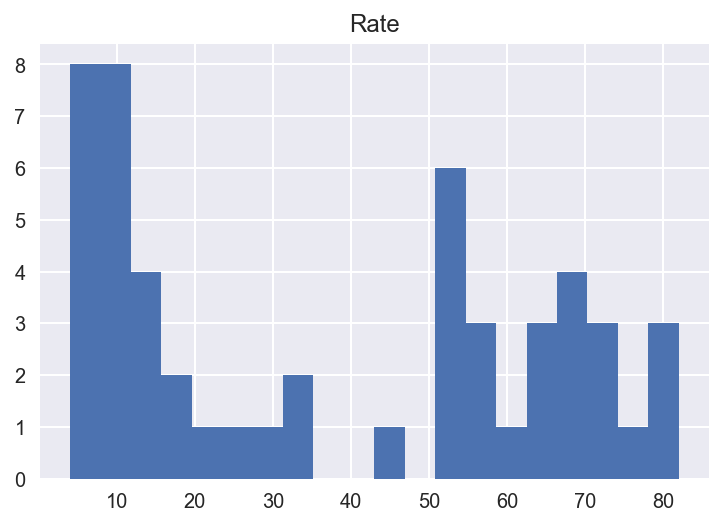

In [185]:
# pull out rate variable as df
rate = df_sat[['Rate']]

# outliers are a point that falls more than 1.5 times the interquartile range 
# above the third quartile or below the first quartile

# plot box plot to see if there are outliers
sns.boxplot(rate, width = 0.3)
# visually, does not look like there are outliers...

# plot a histogram to see if there are outliers
rate.hist(bins=20)
# also does not appear to have outliers

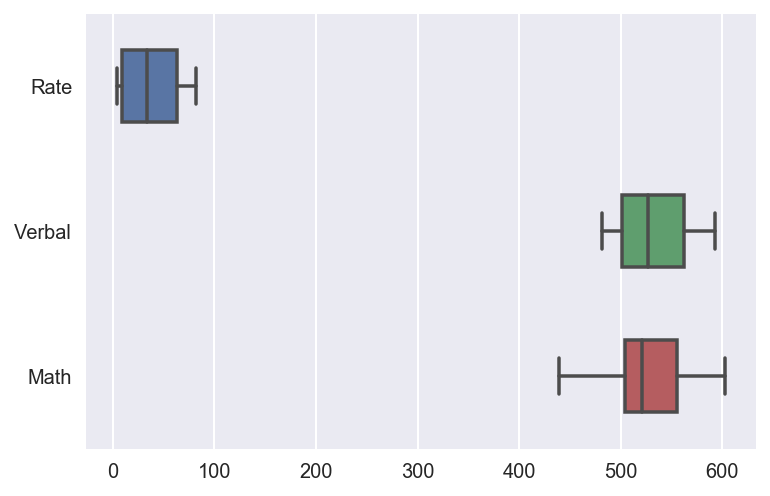

In [186]:
# check the rest of the SAT dataset for outliers
sns.boxplot(data= df_sat, orient='h', width=0.5)

# The rest of the SAT dataset does not have outliers either.

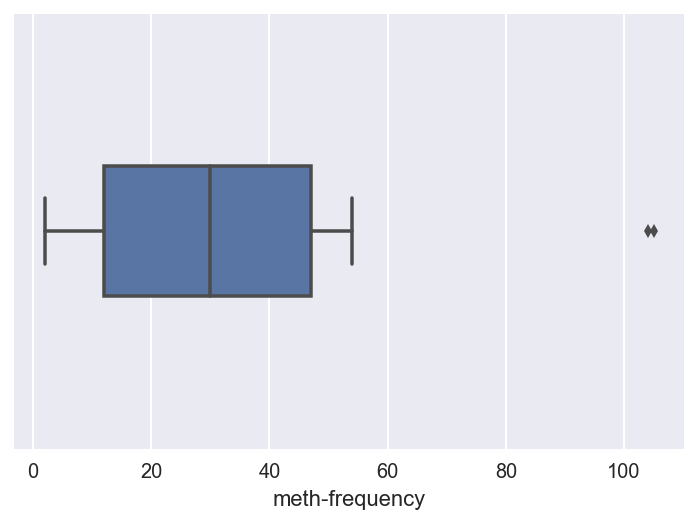

In [187]:
# just take a variable from the drugs dataset with outliers
meth_f = drugs['meth-frequency']
meth_f.dropna(inplace=True)
sns.boxplot(meth_f, orient='h', width=0.3)

In [188]:
# print the outliers
q25, q75 = np.percentile(meth_f, [25, 75])
iqr = q75 - q25
outliers = list(meth_f[meth_f >= meth_f.median()+1.5*iqr])
outliers

[105.0, 104.0]

In [189]:
# remove outliers
meth_f = pd.DataFrame(meth_f)
meth_f.columns= ['with_outliers']
meth_f['no_outliers'] = meth_f['with_outliers'].map(lambda x: np.nan if x in outliers else x)

# calculate mean, median, std
meth_ft = meth_f.T
meth_ft['mean'] = meth_ft.mean(skipna=True, axis=1)
meth_ft['median'] = meth_ft.median(skipna=True, axis=1)
meth_ft['std'] = meth_ft.std(skipna=True, axis=1)
meth_ft = meth_ft[['mean', 'median', 'std']]
meth_ft

,mean,median,std
with_outliers,35.966667,30.000000,29.944470
no_outliers,25.423077,24.711538,15.753448


The mean, median and standard deviation of the cleaned dataset is much lower than the version without outliers.

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and spearman rank correlation

---

### 9.1 Calculate the spearman correlation of sat `Verbal` and `Math`

1. How does the spearman correlation compare to the pearson correlation? 
2. Describe clearly in words the process of calculating the spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [190]:
spearman = df_sat[['Verbal', 'Math']].corr(method='spearman').iloc[0,1]
pearson = df_sat[['Verbal', 'Math']].corr(method='pearson').iloc[0,1]

In [191]:
print 'Spearman: ', spearman, ', Pearson: ', pearson
print 'Difference: ', spearman - pearson

Spearman:  0.905204884794 , Pearson:  0.899870852544
Difference:  0.0053340322496


The spearman correlation is very similar to the pearson correlation in this case, because the relationship is quite linear.

To calculate spearman's correlation, 
1. sort the data and rank each datapoint for each variable, giving tied data the mean rank
2. find the differences in paired ranks (for this case, rank(verbal) - rank(math))
3. calculate the spearman rank coefficient using:

$$ r = 1 - \frac {6 \sum d_i^2} {n^3 - n}$$

where $d_i$ is the differences in paired ranks, $n$ is the number of rows

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the spearman rank correlation?

In [192]:
df_sat['State'].unique()

array(['CT', 'NJ', 'MA', 'NY', 'NH', 'RI', 'PA', 'VT', 'ME', 'VA', 'DE',
       'MD', 'NC', 'GA', 'IN', 'SC', 'DC', 'OR', 'FL', 'WA', 'TX', 'HI',
       'AK', 'CA', 'AZ', 'NV', 'CO', 'OH', 'MT', 'WV', 'ID', 'TN', 'NM',
       'IL', 'KY', 'WY', 'MI', 'MN', 'KS', 'AL', 'NE', 'OK', 'MO', 'LA',
       'WI', 'AR', 'UT', 'IA', 'SD', 'ND', 'MS', 'All'], dtype=object)

In [193]:
## must first remove the 'all' row from the sat data in order to calculate the correct percentile
df_satc = df_sat.drop(51, axis=0)
print df_sat.shape , df_satc.shape

# convert to new column
df_satc['Percentile_Rate'] = df_satc['Rate'].map(lambda x: stats.percentileofscore(df_satc['Rate'], x))
df_satc.loc[(df_sat['State']=='CA'), ['State', 'Percentile_Rate']]


(52, 4) (51, 4)


,State,Percentile_Rate
23,CA,55.882353


In [194]:
# The percentiles can be scaled to match the rank order in the spearman correlation coefficient
df_satc['Rank Order'] = 52 - df_satc['Percentile_Rate']*51. /100.
df_satc.head()

,State,Rate,Verbal,Math,Percentile_Rate,Rank Order
0,CT,82,509,510,100.000000,1.0
1,NJ,81,499,513,98.039216,2.0
2,MA,79,511,515,96.078431,3.0
3,NY,77,495,505,94.117647,4.0
4,NH,72,520,516,92.156863,5.0


### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of coverting raw scores to percentile.

Percentile scoring can help to scale the axis such that the effect of outliers is removed. 

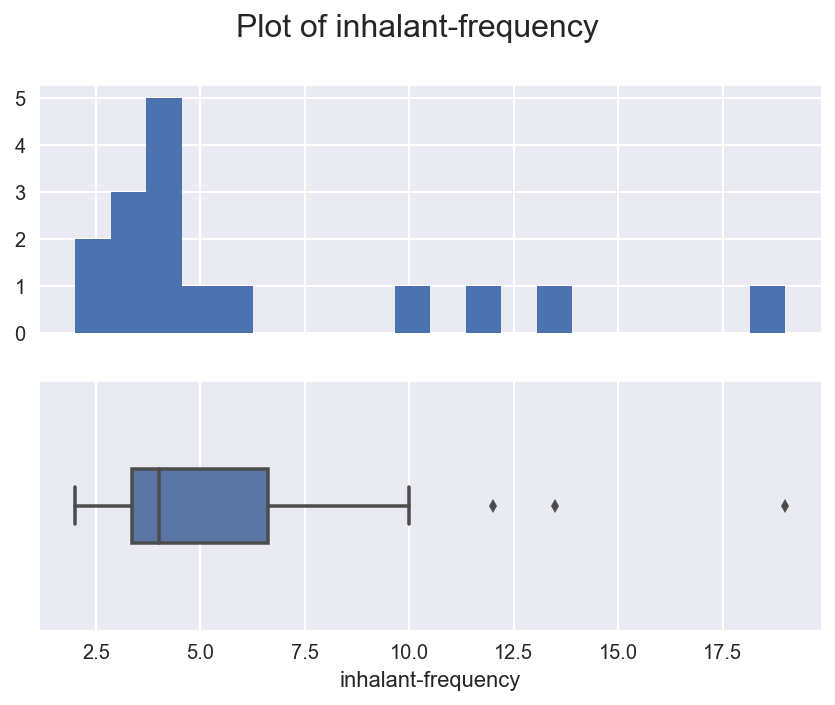

In [195]:
# plot inhalant-frequency
fig, ax = plt.subplots(2,1, figsize=(7,5), sharex= True)
in_freq = drugs['inhalant-frequency']
in_freq.hist(bins=20, ax=ax[0])
sns.boxplot(in_freq, ax=ax[1], width=0.3)
ax = fig.suptitle('Plot of inhalant-frequency', fontsize=16)

0     94.117647
1     82.352941
2     64.705882
3     70.588235
4     20.588235
5     47.058824
6     47.058824
7     20.588235
8     47.058824
9      8.823529
10    47.058824
11     8.823529
12    47.058824
13    29.411765
14    76.470588
15    88.235294
16          NaN
Name: inhalant-frequency, dtype: float64


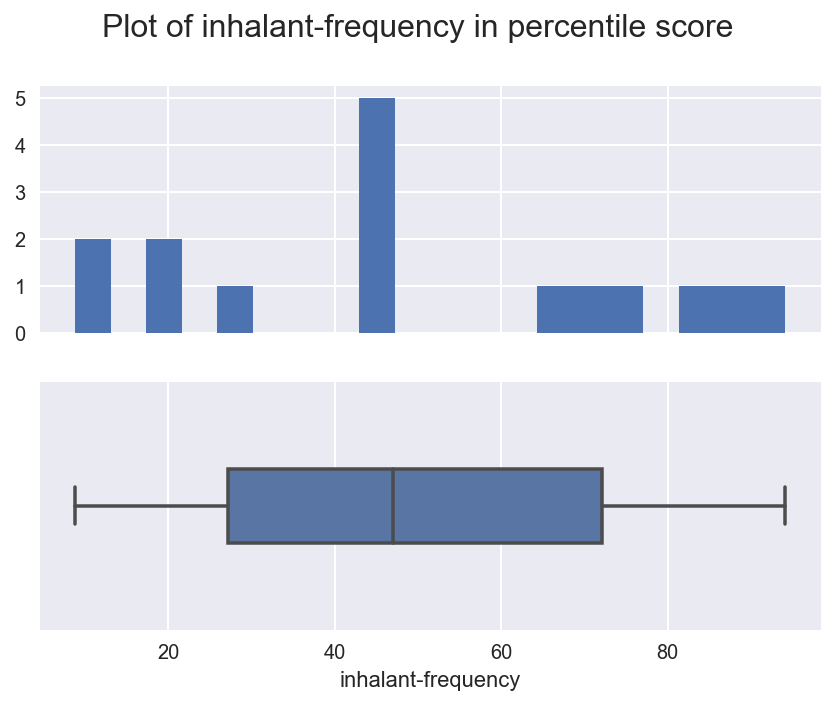

In [196]:
# convert to percentiles
p_in_freq = in_freq.map(lambda x: stats.percentileofscore(in_freq, x))
print p_in_freq

# plot inhalent-frequency
fig, ax = plt.subplots(2,1, figsize=(7,5), sharex= True)
p_in_freq.hist(bins=20, ax=ax[0])
sns.boxplot(p_in_freq, ax=ax[1], width=0.3)
ax = fig.suptitle('Plot of inhalant-frequency in percentile score', fontsize=16)

Visually, the outliers in the box plot are gone.